<a href="https://colab.research.google.com/github/42msa/yandex_practicum/blob/main/Mariya_Shamraeva_v2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<img src="http://s3.amazonaws.com/pix.iemoji.com/images/emoji/apple/ios-12/256/waving-hand.png" align=left width=44, heigth=44>
<div class="alert alert-info">
<b> Комментарий ревьюера</b>


Привет, Мария! Давай знакомиться! Меня зовут Дмитрий Махортов, и я буду проверять твой проект. Сразу предлагаю общение на «ты» 🙂, но если тебе это не комфортно, то дай знать, и мы перейдем на «вы».


Моя основная цель — не указать на совершенные тобою ошибки, а поделиться своим опытом и помочь тебе погрузиться в увлекательный мир работы с данными и вырасти в крепкого профи. Это отдаленная цель. А ближайшая - сделать твою работу еще лучше )).
   
    
Все ключевые этапы в работе выполнены, и я вижу что с проектом ты справшяешься. Есть моменты, которые нужно доработать, но я уверен, у тебя все получится.
        
Расскажу как обычно проходит проверка:    
Бывают моменты, которые требуют пристального внимания. Комментарии по ним выделены <span style='background-color:#F7B3A4'> красным цветом </span> и обозначены значком 🛑. После их доработки проект будет принят.  🙂

<span style='background-color:#B7EBA7'> Зеленым цветом </span> и значком ✅ отмечены удачные и элегантные решения, на которые можно опираться в будущих проектах. Или советы «со звездочкой», которые помогут тебе в будущем.

<span style='background-color:#F9EDA6'>Жёлтым цветом </span> и значком ⚠️ выделено то, что в следующий раз можно сделать по-другому. Ты можешь учесть эти комментарии при выполнении будущих заданий или доработать проект сейчас (однако это не обязательно).

Давай работать над проектом в диалоге: **если ты что-то меняешь в проекте по моим рекомендациям — пиши об этом**. Выбери для своих комментариев какой-то заметный цвет, так мне будет легче отследить изменения. Пожалуйста, **не перемещай, не изменяй и не удаляй мои комментарии**. Всё это поможет выполнить повторную проверку твоего проекта оперативнее.
</div>

<div class="alert" style="background-color:#ead7f7;color:#8737bf">
    <font size="3"><b> комментарий студента</b></font>
   
день добрый, Дмитрий! 🙂

</div>

# Сборный проект-4, 5

Необходимо разработать демонстрационную версию поиска изображений по запросу.

Для демонстрационной версии нужно обучить модель, которая получит векторное представление изображения, векторное представление текста, а на выходе выдаст число от 0 до 1 — покажет, насколько текст и картинка подходят друг другу.

### Описание данных


В файле `train_dataset.csv` находится информация, необходимая для обучения: имя файла изображения, идентификатор описания и текст описания. Для одной картинки может быть доступно до 5 описаний. Идентификатор описания имеет формат `<имя файла изображения>#<порядковый номер описания>`.

В папке `train_images` содержатся изображения для тренировки модели.

В файле `CrowdAnnotations.tsv` — данные по соответствию изображения и описания, полученные с помощью краудсорсинга. Номера колонок и соответствующий тип данных:

1. Имя файла изображения.
2. Идентификатор описания.
3. Доля людей, подтвердивших, что описание соответствует изображению.
4. Количество человек, подтвердивших, что описание соответствует изображению.
5. Количество человек, подтвердивших, что описание не соответствует изображению.

В файле `ExpertAnnotations.tsv` содержатся данные по соответствию изображения и описания, полученные в результате опроса экспертов. Номера колонок и соответствующий тип данных:

1. Имя файла изображения.
2. Идентификатор описания.

3, 4, 5 — оценки трёх экспертов.

Эксперты ставят оценки по шкале от 1 до 4, где 1 — изображение и запрос совершенно не соответствуют друг другу, 2 — запрос содержит элементы описания изображения, но в целом запрос тексту не соответствует, 3 — запрос и текст соответствуют с точностью до некоторых деталей, 4 — запрос и текст соответствуют полностью.

В файле `test_queries.csv` находится информация, необходимая для тестирования: идентификатор запроса, текст запроса и релевантное изображение. Для одной картинки может быть доступно до 5 описаний. Идентификатор описания имеет формат `<имя файла изображения>#<порядковый номер описания>`.

В папке `test_images` содержатся изображения для тестирования модели.

<img src="https://emojigraph.org/media/apple/check-mark-button_2705.png" align=left width=33, heigth=33>
<div class="alert alert-success">
 👍 Да, это хорошая практика - дать описание контекста и проблемы, которую мы решаем. </div>

## 1. Исследовательский анализ данных

Наш датасет содержит экспертные и краудсорсинговые оценки соответствия текста и изображения.

В файле с экспертными мнениями для каждой пары изображение-текст имеются оценки от трёх специалистов. Для решения задачи вы должны эти оценки агрегировать — превратить в одну. Существует несколько способов агрегации оценок, самый простой — голосование большинства: за какую оценку проголосовала большая часть экспертов (в нашем случае 2 или 3), та оценка и ставится как итоговая. Поскольку число экспертов меньше числа классов, может случиться, что каждый эксперт поставит разные оценки, например: 1, 4, 2. В таком случае данную пару изображение-текст можно исключить из датасета.

Вы можете воспользоваться другим методом агрегации оценок или придумать свой.

В файле с краудсорсинговыми оценками информация расположена в таком порядке:

1. Доля исполнителей, подтвердивших, что текст **соответствует** картинке.
2. Количество исполнителей, подтвердивших, что текст **соответствует** картинке.
3. Количество исполнителей, подтвердивших, что текст **не соответствует** картинке.

После анализа экспертных и краудсорсинговых оценок выберите либо одну из них, либо объедините их в одну по какому-то критерию: например, оценка эксперта принимается с коэффициентом 0.6, а крауда — с коэффициентом 0.4.

Ваша модель должна возвращать на выходе вероятность соответствия изображения тексту, поэтому целевая переменная должна иметь значения от 0 до 1.


In [108]:
import os
import kagglehub
import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
import seaborn as sns
import re
import shutil
import random
import cv2
import keras.backend as K

from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, GlobalAveragePooling2D, Dense, Dropout,  BatchNormalization
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.applications.resnet50 import preprocess_input
from tensorflow.keras.preprocessing import image
from tensorflow.keras.callbacks import ReduceLROnPlateau
from keras.regularizers import l2
from tensorflow.keras.models import Model
from tensorflow.keras.preprocessing.image import load_img, img_to_array

from tqdm.notebook import tqdm
from tabulate import tabulate

from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import GroupShuffleSplit
from sklearn.preprocessing import StandardScaler
from sklearn.metrics.pairwise import cosine_similarity
from scipy.stats import spearmanr
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error

from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input

from sentence_transformers import SentenceTransformer

import torch
import torchvision.transforms as transforms
import torchvision.models as models

import nltk

import nltk
from nltk.corpus import stopwords, wordnet
from sklearn.feature_extraction.text import TfidfVectorizer
from pymystem3 import Mystem
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from nltk import pos_tag

from IPython.display import display
from PIL import Image

from sklearn.dummy import DummyRegressor



In [109]:
gpu_info = !nvidia-smi
gpu_info = '\n'.join(gpu_info)
if gpu_info.find('failed') >= 0:
  print('Not connected to a GPU')
else:
  print(gpu_info)

Thu Feb 13 01:18:10 2025       
+-----------------------------------------------------------------------------------------+
| NVIDIA-SMI 550.54.15              Driver Version: 550.54.15      CUDA Version: 12.4     |
|-----------------------------------------+------------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id          Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |           Memory-Usage | GPU-Util  Compute M. |
|                                         |                        |               MIG M. |
|=========================================+========================+======================|
|   0  Tesla T4                       Off |   00000000:00:04.0 Off |                    0 |
| N/A   43C    P0             28W /   70W |     166MiB /  15360MiB |      0%      Default |
|                                         |                        |                  N/A |
+-----------------------------------------+-----

In [110]:
from psutil import virtual_memory
ram_gb = virtual_memory().total / 1e9
print('Your runtime has {:.1f} gigabytes of available RAM\n'.format(ram_gb))

if ram_gb < 20:
  print('Not using a high-RAM runtime')
else:
  print('You are using a high-RAM runtime!')

Your runtime has 54.8 gigabytes of available RAM

You are using a high-RAM runtime!


<img src="https://emojigraph.org/media/apple/check-mark-button_2705.png" align=left width=33, heigth=33>
<div class="alert alert-success">
Отлично, все нужные библиотеки импортированы в начале ноутбука.Это хорошая практика.</div>

In [111]:
nltk.download("punkt")
nltk.download("stopwords")
nltk.download("wordnet")
nltk.download("averaged_perceptron_tagger")
nltk.download('averaged_perceptron_tagger_eng')
nltk.download('punkt_tab')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package averaged_perceptron_tagger_eng to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger_eng is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


True

### Первичный анализ данных

In [112]:
base_path = "/content"

<img src="https://emojigraph.org/media/apple/check-mark-button_2705.png" align=left width=33, heigth=33>
<div class="alert alert-success">
Молодец, что вынесла базовый путь в отдельную константу
    
</div>

<img src="https://upload.wikimedia.org/wikipedia/commons/b/ba/Warning_sign_4.0.png" align=left width=44, heigth=33>
<div class="alert alert-warning">
Я вижу что ты работаешь в Colab, но не вижу как ты загружаешь датасет. Как правило тут есть три пути:
    
1. Автоматически скачивать с серверов Практикума и делать распаковку
2. Хранить датасет на Google Disk
3. Каждый раз руками закачивать датасет на виртуальную машину
    
И похоже ты используешь третий вариант, что дико неудобно.
    
Вот универсальный код для загрузки датасета (скачивается и распаковывается в папку '/content/to_upload'    
    
    
    # загрузка датасета

    !wget -q https://code.s3.yandex.net/datasets/dsplus_integrated_project_4.zip
    !unzip -q dsplus_integrated_project_4.zip

    DATA_PATH = '/content/to_upload'
    
    
</div>

In [113]:
alternative_paths = {
    "CrowdAnnotations": [f"{base_path}/CrowdAnnotations.tsv"],
    "ExpertAnnotations": [f"{base_path}/ExpertAnnotations.tsv"],
    "TestQueries": [f"{base_path}/test_queries.csv"],
    "TrainDataset": [f"{base_path}/train_dataset.csv"],
    "TestImages": [f"{base_path}/test_images.csv"]
}

In [114]:
image_paths = {
    "TrainImages": [f"{base_path}/train_images"],
    "TestImages": [f"{base_path}/test_images"]
}


In [115]:
def load_csv_auto_delimiter(file_path):
    with open(file_path, 'r', encoding='utf-8') as file:
        sample_lines = [next(file) for _ in range(5)]
    delimiter = csv.Sniffer().sniff(''.join(sample_lines)).delimiter
    return pd.read_csv(file_path, delimiter=delimiter)

In [116]:
def load_csv_with_fallback(key, sep=',', decimal='.'):
    paths = alternative_paths[key]
    for path in paths:
        if os.path.exists(path):
            try:
                return pd.read_csv(path, sep=sep, decimal=decimal, on_bad_lines='skip')
            except pd.errors.ParserError as e:
                print(f"ParserError in {key}: {e}")
                return None
    print(f"{key} not found. Please upload it manually to {base_path}.")
    return None

In [117]:
def check_image_folder(paths):
    for path in paths:
        if os.path.exists(path):
            return path
    print(f"Error: None of the image paths {paths} found.")
    return None

In [118]:
for path in alternative_paths["TestQueries"]:
    if os.path.exists(path):
        try:
            test_queries = pd.read_csv(path, sep='|', engine='python')
            print("Successfully loaded TestQueries with '|' separator.")
            break
        except pd.errors.ParserError:
            print(f"ParserError with '|' separator for {path}, trying default separator.")
            test_queries = load_csv_with_fallback("TestQueries")


Successfully loaded TestQueries with '|' separator.


In [119]:
train_images_path = check_image_folder(image_paths["TrainImages"])
test_images_path = check_image_folder(image_paths["TestImages"])

In [120]:
crowd_annotations = load_csv_with_fallback("CrowdAnnotations", sep='\t')
expert_annotations = load_csv_with_fallback("ExpertAnnotations", sep='\t')
test_queries = load_csv_with_fallback("TestQueries",  sep='|')
train_dataset = load_csv_with_fallback("TrainDataset")
test_images = load_csv_with_fallback("TestImages")


In [121]:
if crowd_annotations is not None:
    crowd_annotations.columns = ["image", "query_id", "agreement_score", "confirmed_count", "rejected_count"]
if expert_annotations is not None:
    expert_annotations.columns = ["image", "query_id", "expert_1", "expert_2", "expert_3"]

####  Ознакомление с CrowdAnnotations.tsv

In [122]:
if crowd_annotations is not None:
    print("CrowdAnnotations:")
    display(crowd_annotations)


CrowdAnnotations:


image                     query_id  \
0      1056338697_4f7d7ce270.jpg   114051287_dd85625a04.jpg#2   
1      1056338697_4f7d7ce270.jpg  1427391496_ea512cbe7f.jpg#2   
2      1056338697_4f7d7ce270.jpg  2073964624_52da3a0fc4.jpg#2   
3      1056338697_4f7d7ce270.jpg  2083434441_a93bc6306b.jpg#2   
4      1056338697_4f7d7ce270.jpg  2204550058_2707d92338.jpg#2   
...                          ...                          ...   
47824   997722733_0cb5439472.jpg   543007912_23fc735b99.jpg#2   
47825   997722733_0cb5439472.jpg   544576742_283b65fa0d.jpg#2   
47826   997722733_0cb5439472.jpg   872622575_ba1d3632cc.jpg#2   
47827   997722733_0cb5439472.jpg   888425986_e4b6c12324.jpg#2   
47828   997722733_0cb5439472.jpg   997722733_0cb5439472.jpg#2   

       agreement_score  confirmed_count  rejected_count  
0             0.000000                0               3  
1             0.000000                0               3  
2             0.000000                0               3  
3             0.000000                0               3  
4             0.000000                0               3  
...                ...              ...             ...  
47824         0.000000                0               3  
47825         0.333333                1               2  
47826         1.000000                3               0  
47827         0.000000                0               3  
47828         0.666667                2               1  

[47829 rows x 5 columns]

In [123]:
if test_images is not None:
    print("\nTest Images Info:")
    crowd_annotations.info()


Test Images Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 47829 entries, 0 to 47828
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   image            47829 non-null  object 
 1   query_id         47829 non-null  object 
 2   agreement_score  47829 non-null  float64
 3   confirmed_count  47829 non-null  int64  
 4   rejected_count   47829 non-null  int64  
dtypes: float64(1), int64(2), object(2)
memory usage: 1.8+ MB


In [124]:
missing_values = {
    "CrowdAnnotations": crowd_annotations.isnull().sum().to_dict() if crowd_annotations is not None else {}
}

In [125]:
print("\nMissing Values:\n")
for dataset_name, missing in missing_values.items():
    print(f"{dataset_name}:\n")
    table = [[col, val] for col, val in missing.items()]
    print(tabulate(table, headers=["Column", "Missing Values"], tablefmt="pretty"))
    print("\n" + "-" * 40 + "\n")


Missing Values:

CrowdAnnotations:

+-----------------+----------------+
|     Column      | Missing Values |
+-----------------+----------------+
|      image      |       0        |
|    query_id     |       0        |
| agreement_score |       0        |
| confirmed_count |       0        |
| rejected_count  |       0        |
+-----------------+----------------+

----------------------------------------



####  Ознакомление с ExpertAnnotations.tsv

In [126]:
if expert_annotations is not None:
    print("\nExpertAnnotations:")
    display(expert_annotations)


ExpertAnnotations:


image                     query_id  expert_1  \
0     1056338697_4f7d7ce270.jpg  2718495608_d8533e3ac5.jpg#2         1   
1     1056338697_4f7d7ce270.jpg  3181701312_70a379ab6e.jpg#2         1   
2     1056338697_4f7d7ce270.jpg  3207358897_bfa61fa3c6.jpg#2         1   
3     1056338697_4f7d7ce270.jpg  3286822339_5535af6b93.jpg#2         1   
4     1056338697_4f7d7ce270.jpg  3360930596_1e75164ce6.jpg#2         1   
...                         ...                          ...       ...   
5816   997722733_0cb5439472.jpg  2981702521_2459f2c1c4.jpg#2         1   
5817   997722733_0cb5439472.jpg  2985679744_75a7102aab.jpg#2         1   
5818   997722733_0cb5439472.jpg  3150742439_b8a352e1e0.jpg#2         1   
5819   997722733_0cb5439472.jpg  3375070563_3c290a7991.jpg#2         1   
5820   997722733_0cb5439472.jpg   486917990_72bd4069af.jpg#2         3   

      expert_2  expert_3  
0            1         2  
1            1         2  
2            2         2  
3            1         2  
4            1         1  
...        ...       ...  
5816         1         1  
5817         1         1  
5818         1         2  
5819         1         1  
5820         3         3  

[5821 rows x 5 columns]

In [127]:
if test_images is not None:
    print("\nTest Images Info:")
    expert_annotations.info()


Test Images Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5821 entries, 0 to 5820
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   image     5821 non-null   object
 1   query_id  5821 non-null   object
 2   expert_1  5821 non-null   int64 
 3   expert_2  5821 non-null   int64 
 4   expert_3  5821 non-null   int64 
dtypes: int64(3), object(2)
memory usage: 227.5+ KB


In [128]:
missing_values = {
    "ExpertAnnotations": expert_annotations.isnull().sum().to_dict() if expert_annotations is not None else {}
}

In [129]:
print("\nMissing Values:\n")
for dataset_name, missing in missing_values.items():
    print(f"{dataset_name}:\n")
    table = [[col, val] for col, val in missing.items()]
    print(tabulate(table, headers=["Column", "Missing Values"], tablefmt="pretty"))
    print("\n" + "-" * 40 + "\n")


Missing Values:

ExpertAnnotations:

+----------+----------------+
|  Column  | Missing Values |
+----------+----------------+
|  image   |       0        |
| query_id |       0        |
| expert_1 |       0        |
| expert_2 |       0        |
| expert_3 |       0        |
+----------+----------------+

----------------------------------------



####  Ознакомление с TestQueries.csv

In [130]:
test_queries = test_queries.drop(columns=["Unnamed: 0"], errors="ignore")

In [131]:
if test_queries is not None:
    print("\nTestQueries:")
    display(test_queries)


TestQueries:


query_id  \
0    1177994172_10d143cb8d.jpg#0   
1    1177994172_10d143cb8d.jpg#1   
2    1177994172_10d143cb8d.jpg#2   
3    1177994172_10d143cb8d.jpg#3   
4    1177994172_10d143cb8d.jpg#4   
..                           ...   
495   989851184_9ef368e520.jpg#0   
496   989851184_9ef368e520.jpg#1   
497   989851184_9ef368e520.jpg#2   
498   989851184_9ef368e520.jpg#3   
499   989851184_9ef368e520.jpg#4   

                                            query_text  \
0    Two blonde boys , one in a camouflage shirt an...   
1    Two boys are squirting water guns at each other .   
2              Two boys spraying each other with water   
3    Two children wearing jeans squirt water at eac...   
4    Two young boys are squirting water at each oth...   
..                                                 ...   
495          A black dog has a dumbbell in his mouth .   
496  A black dog has a dumbbell in his mouth lookin...   
497  A black dog holding a weight in its mouth stan...   
498  A black dog holds a small white dumbbell in it...   
499  The black dog has a toy in its mouth and a per...   

                         image  
0    1177994172_10d143cb8d.jpg  
1    1177994172_10d143cb8d.jpg  
2    1177994172_10d143cb8d.jpg  
3    1177994172_10d143cb8d.jpg  
4    1177994172_10d143cb8d.jpg  
..                         ...  
495   989851184_9ef368e520.jpg  
496   989851184_9ef368e520.jpg  
497   989851184_9ef368e520.jpg  
498   989851184_9ef368e520.jpg  
499   989851184_9ef368e520.jpg  

[500 rows x 3 columns]

In [132]:
if test_queries is not None:
    print("\nTest Queries Info:")
    test_queries.info()


Test Queries Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   query_id    500 non-null    object
 1   query_text  500 non-null    object
 2   image       500 non-null    object
dtypes: object(3)
memory usage: 11.8+ KB


In [133]:
missing_values = {
    "TestQueries": test_queries.isnull().sum().to_dict() if test_queries is not None else {}
}

In [134]:
print("\nMissing Values:\n")
for dataset_name, missing in missing_values.items():
    print(f"{dataset_name}:\n")
    table = [[col, val] for col, val in missing.items()]
    print(tabulate(table, headers=["Column", "Missing Values"], tablefmt="pretty"))
    print("\n" + "-" * 40 + "\n")


Missing Values:

TestQueries:

+------------+----------------+
|   Column   | Missing Values |
+------------+----------------+
|  query_id  |       0        |
| query_text |       0        |
|   image    |       0        |
+------------+----------------+

----------------------------------------



####  Ознакомление с TrainDataset.csv

In [135]:
if train_dataset is not None:
    print("\nTrainDataset:")
    display(train_dataset)


TrainDataset:


image                     query_id  \
0     1056338697_4f7d7ce270.jpg  2549968784_39bfbe44f9.jpg#2   
1     1262583859_653f1469a9.jpg  2549968784_39bfbe44f9.jpg#2   
2     2447284966_d6bbdb4b6e.jpg  2549968784_39bfbe44f9.jpg#2   
3     2549968784_39bfbe44f9.jpg  2549968784_39bfbe44f9.jpg#2   
4     2621415349_ef1a7e73be.jpg  2549968784_39bfbe44f9.jpg#2   
...                         ...                          ...   
5817   757046028_ff5999f91b.jpg  2061144717_5b3a1864f0.jpg#2   
5818   799486353_f665d7b0f0.jpg  2196107384_361d73a170.jpg#2   
5819   909808296_23c427022d.jpg  2112921744_92bf706805.jpg#2   
5820   929679367_ff8c7df2ee.jpg  3651971126_309e6a5e22.jpg#2   
5821   968081289_cdba83ce2e.jpg  2292406847_f366350600.jpg#2   

                                             query_text  
0     A young child is wearing blue goggles and sitt...  
1     A young child is wearing blue goggles and sitt...  
2     A young child is wearing blue goggles and sitt...  
3     A young child is wearing blue goggles and sitt...  
4     A young child is wearing blue goggles and sitt...  
...                                                 ...  
5817         A man in an ampitheater talking to a boy .  
5818          a old man walks down the uncrowded road .  
5819       A dog stands on the side of a grassy cliff .  
5820                       A blurry photo of two dogs .  
5821                        A man rows his boat below .  

[5822 rows x 3 columns]

In [136]:
if train_dataset is not None:
    print("\nTrain Dataset Info:")
    train_dataset.info()


Train Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5822 entries, 0 to 5821
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   image       5822 non-null   object
 1   query_id    5822 non-null   object
 2   query_text  5822 non-null   object
dtypes: object(3)
memory usage: 136.6+ KB


In [137]:
missing_values = {
    "TrainDataset": train_dataset.isnull().sum().to_dict() if train_dataset is not None else {},
}

In [138]:
print("\nMissing Values:\n")
for dataset_name, missing in missing_values.items():
    print(f"{dataset_name}:\n")
    table = [[col, val] for col, val in missing.items()]
    print(tabulate(table, headers=["Column", "Missing Values"], tablefmt="pretty"))
    print("\n" + "-" * 40 + "\n")


Missing Values:

TrainDataset:

+------------+----------------+
|   Column   | Missing Values |
+------------+----------------+
|   image    |       0        |
|  query_id  |       0        |
| query_text |       0        |
+------------+----------------+

----------------------------------------



####  Ознакомление с TestImages.csv

In [139]:
if test_images is not None:
    print("\nTestImages:")
    display(test_images)


TestImages:


image
0   3356748019_2251399314.jpg
1   2887171449_f54a2b9f39.jpg
2   3089107423_81a24eaf18.jpg
3   1429546659_44cb09cbe2.jpg
4   1177994172_10d143cb8d.jpg
..                        ...
95  2431120202_b24fe2333a.jpg
96  2399219552_bbba0a9a59.jpg
97  3091962081_194f2f3bd4.jpg
98  2670637584_d96efb8afa.jpg
99  2346402952_e47d0065b6.jpg

[100 rows x 1 columns]

In [140]:
if test_images is not None:
    print("\nTest Images Info:")
    test_images.info()


Test Images Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   image   100 non-null    object
dtypes: object(1)
memory usage: 932.0+ bytes


In [141]:
missing_values = {
    "TestImages": test_images.isnull().sum().to_dict() if train_dataset is not None else {},
}

In [142]:
print("\nMissing Values:\n")
for dataset_name, missing in missing_values.items():
    print(f"{dataset_name}:\n")
    table = [[col, val] for col, val in missing.items()]
    print(tabulate(table, headers=["Column", "Missing Values"], tablefmt="pretty"))
    print("\n" + "-" * 40 + "\n")


Missing Values:

TestImages:

+--------+----------------+
| Column | Missing Values |
+--------+----------------+
| image  |       0        |
+--------+----------------+

----------------------------------------



<img src="https://upload.wikimedia.org/wikipedia/commons/thumb/8/81/Stop_sign.png/240px-Stop_sign.png" align=left width=35, heigth=35>
<div class="alert alert-danger">
    
Не стоит использовать функцию `print()` для вывода датафреймов, получается не очень красиво (точне некрасиво и неудобно). В большинстве случаев можно вообще обойтись без команды, достаточно обратиться к таблице в последней строке ячейки. Или использовать функцию `display()`
    
Из за крайне высокой важности этого комментария, а также учитывая, что это один из заключительных проектов оставляю комментарий красным.
</div>

<div class="alert" style="background-color:#ead7f7;color:#8737bf">
    <font size="3"><b>комментарий студента</b></font>
   
 Убарала функцию print() для вывода датафреймов. Теперь использую функцию display() 👌

</div>

<img src="https://upload.wikimedia.org/wikipedia/commons/b/ba/Warning_sign_4.0.png" align=left width=44, heigth=33>
<div class="alert alert-warning">
Советую изменить подход к знакомству с данными. Будет лучше, если для каждого датаферйма ты создашь свой раздел и обстоятельно познакомишься с каждым.
    
Текущий подход (попытка одновременно смотреть на все датаферймы) не позволит ни тебе ни читателю ознакомиться с ними. Конечно, формально ты всё показала, но человеческое внимание очень ограничено  и к тому времени как ты дойдешь до следующей ячейки, мы уже забудем то, с чего начинали.  И нужно будет бегать попроекту туда-сюда.
    
    
</div>

<div class="alert" style="background-color:#ead7f7;color:#8737bf">
    <font size="3"><b>комментарий студента</b></font>
   
 Создала раздел для каждого файла:
 - Ознакомление с CrowdAnnotations.tsv
 - Ознакомление с ExpertAnnotations.tsv
 - Ознакомление с TestQueries.csv
 - Ознакомление с TrainDataset.csv
 - Ознакомление с TestImages.csv
 - Ознакомление с TrainImages folder
 - Ознакомление с TestImages folder

Также создала разделы ниже для EDA.

</div>

<img src="https://upload.wikimedia.org/wikipedia/commons/b/ba/Warning_sign_4.0.png" align=left width=44, heigth=33>
<div class="alert alert-warning">
А вот оборачивать результат работы метода  .info() в функцию print() или display() это лишнее. Метод  info() и сам напечатает тебе нужную информацию. А вот через print()/display() ты выводишь только то,что данный метод возвращает - т.е. None
</div>

<div class="alert" style="background-color:#ead7f7;color:#8737bf">
    <font size="3"><b>комментарий студента</b></font>
   
 Оставила только .info() для вывода 👌

</div>

####  Ознакомление с TrainImages folder

In [143]:
num_images = 15
grid_size = (3, 5)

<img src="https://upload.wikimedia.org/wikipedia/commons/thumb/8/81/Stop_sign.png/240px-Stop_sign.png" align=left width=35, heigth=35>
<div class="alert alert-danger">
    
У тебя уже определена переменная `train_images_path` и её путь зависит от base_path.  Не нужно пытаться менять эту переменную, т.к. при запуске кода на другом компьютере с другими базовыми путями здесь неизбежно возникнет ошибка.    


</div>


<div class="alert" style="background-color:#ead7f7;color:#8737bf">
    <font size="3"><b>комментарий студента</b></font>
   
 Удалила train_images_path = "/content/train_images" 👌 Также добавила визуализацию для папки test_images (раньше только для train_images была)

</div>

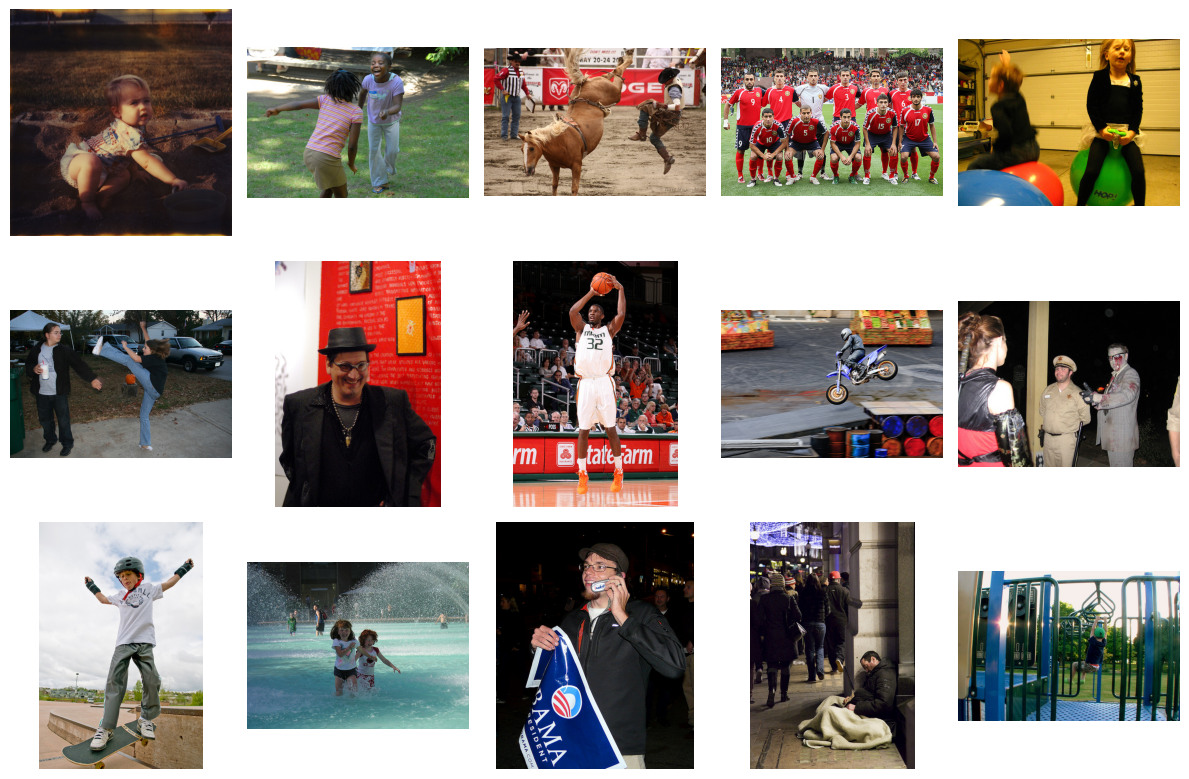

In [144]:
all_images = os.listdir(train_images_path)
sample_images = random.sample(all_images, min(num_images, len(all_images)))

fig, axes = plt.subplots(*grid_size, figsize=(12, 8))
axes = axes.ravel()

for i, filename in enumerate(sample_images):
    img_path = os.path.join(train_images_path, filename)

    try:
        img = Image.open(img_path)
        axes[i].imshow(img)
        axes[i].axis("off")
    except Exception as e:
        print(f"Ошибка при открытии {filename}: {e}")

plt.tight_layout()
plt.show()

####  Ознакомление с TestImages folder

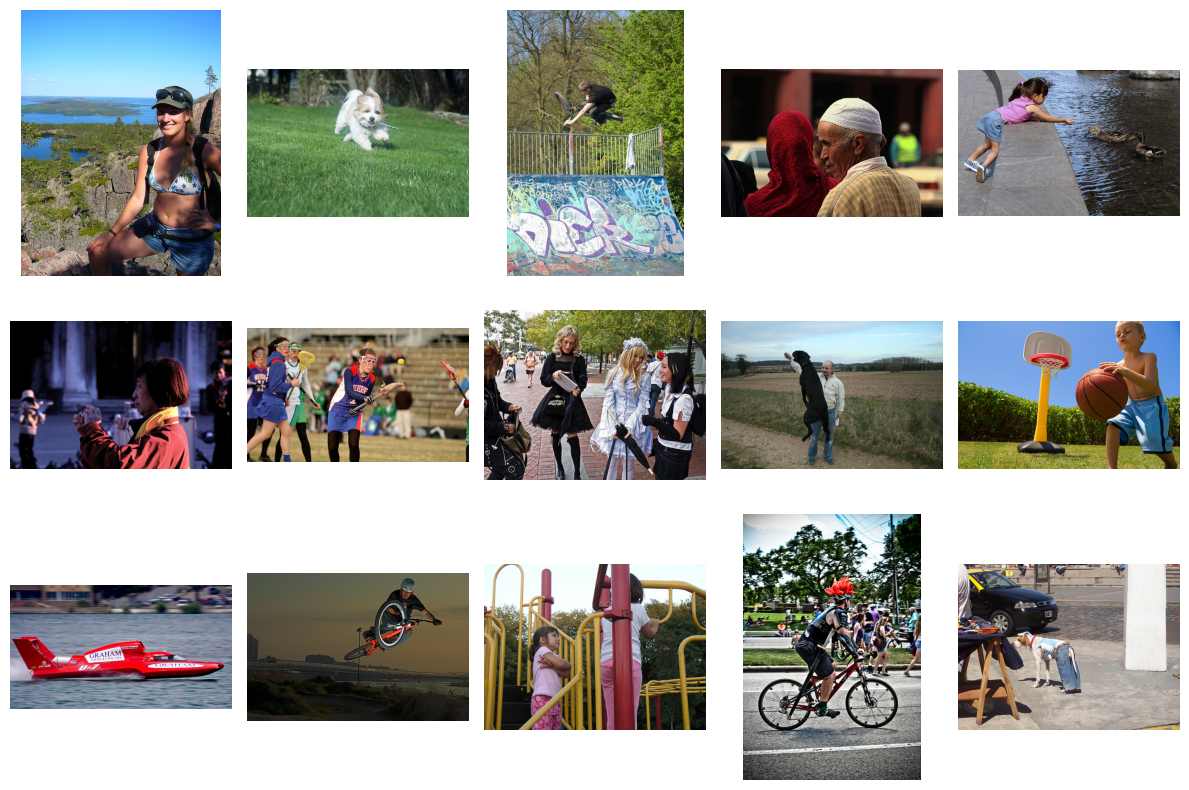

In [145]:
all_images = os.listdir(test_images_path)
sample_images = random.sample(all_images, min(num_images, len(all_images)))

fig, axes = plt.subplots(*grid_size, figsize=(12, 8))
axes = axes.ravel()

for i, filename in enumerate(sample_images):
    img_path = os.path.join(test_images_path, filename)

    try:
        img = Image.open(img_path)
        axes[i].imshow(img)
        axes[i].axis("off")
    except Exception as e:
        print(f"Ошибка при открытии {filename}: {e}")

plt.tight_layout()
plt.show()

<img src="https://emojigraph.org/media/apple/check-mark-button_2705.png" align=left width=33, heigth=33>
<div class="alert alert-success">
Да, все ОК, есть загрузка данных и первичное знакомство.</div>

### 1.2. Exploratory Data Analysis (EDA)

####  EDA для CrowdAnnotations

In [146]:
if crowd_annotations is not None:
    print("\nCrowdAnnotations Summary:")
    display(crowd_annotations.describe())



CrowdAnnotations Summary:


agreement_score  confirmed_count  rejected_count
count     47829.000000     47829.000000    47829.000000
mean          0.068766         0.208430        2.820214
std           0.207490         0.628775        0.656556
min           0.000000         0.000000        0.000000
25%           0.000000         0.000000        3.000000
50%           0.000000         0.000000        3.000000
75%           0.000000         0.000000        3.000000
max           1.000000         5.000000        6.000000

In [147]:
numeric_columns = crowd_annotations.select_dtypes(include=[np.number])

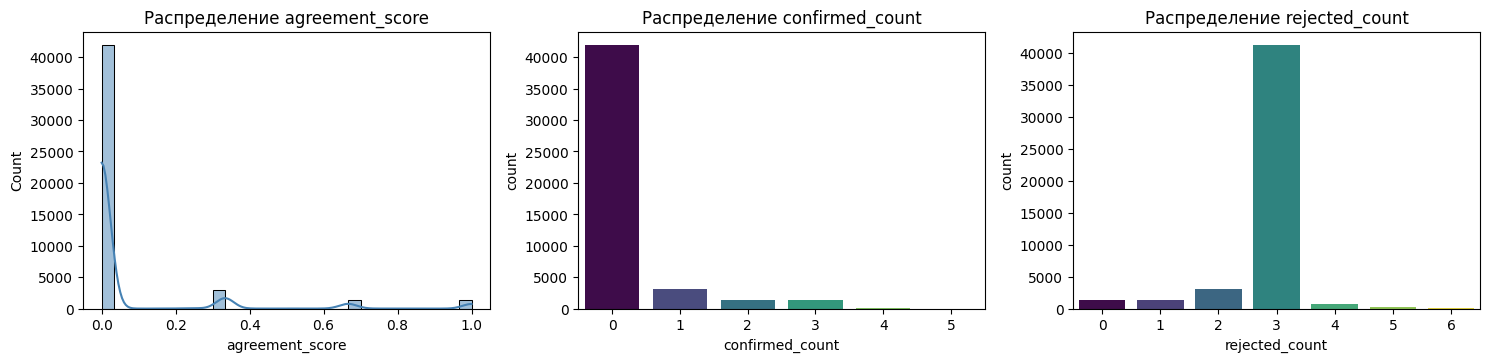

In [148]:
plt.figure(figsize=(15, 10))

for i, col in enumerate(numeric_columns, 1):
    plt.subplot(3, 3, i)

    if crowd_annotations[col].nunique() < 10:
        sns.countplot(x=crowd_annotations[col], hue=crowd_annotations[col], palette="viridis", legend=False)
    else:
        sns.histplot(crowd_annotations[col], bins=30, kde=True, color="steelblue")

    plt.title(f'Распределение {col}')

plt.tight_layout()
plt.show()


<div class="alert" style="background-color:#ead7f7;color:#8737bf">
    <font size="3"><b>комментарий студента</b></font>
   
 Тут раньше были построены histplot с kde=True, которые, как я понимаю, обычно лучше подходят для непрерывных признаков. У нас тут дискретные признаки, поэтому изменила на countplot vs histplot.
</div>

Большинство аннотаций в CrowdAnnotations не согласуются с описаниями изображений, что подтверждается низкими значениями agreement_score и высоким числом отклонений.
Это может свидетельствовать либо о низком качестве описаний, либо о сложности интерпретации изображений.


####  EDA для ExpertAnnotations

In [149]:
if expert_annotations is not None:
    print("\nExpertAnnotations Summary:")
    display(expert_annotations.describe())



ExpertAnnotations Summary:


expert_1     expert_2     expert_3
count  5821.000000  5821.000000  5821.000000
mean      1.436695     1.624463     1.882151
std       0.787130     0.856256     0.904091
min       1.000000     1.000000     1.000000
25%       1.000000     1.000000     1.000000
50%       1.000000     1.000000     2.000000
75%       2.000000     2.000000     2.000000
max       4.000000     4.000000     4.000000

Разброс оценок умеренный.
Эксперты, в основном, считают соответствие слабым или умеренным.

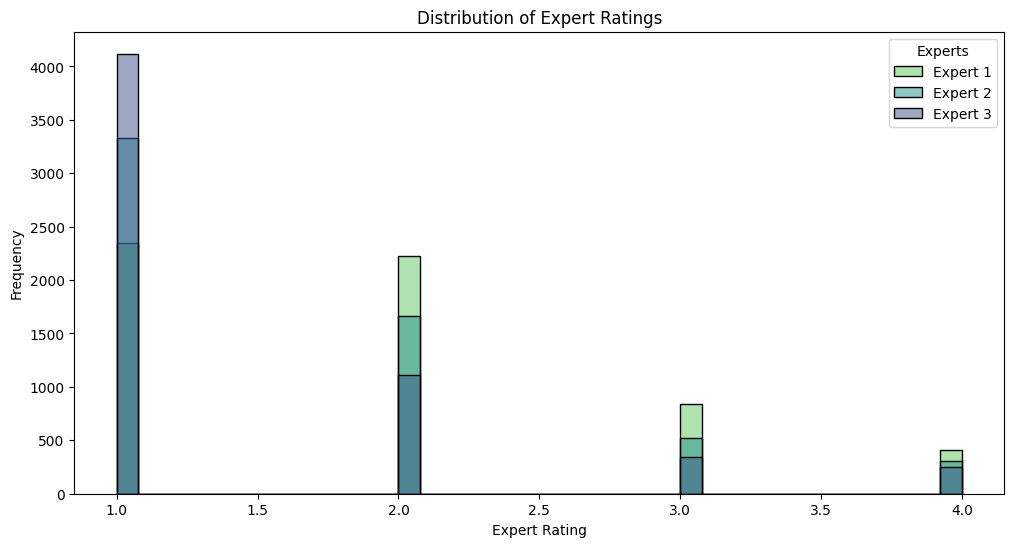

In [150]:
plt.figure(figsize=(12, 6))

sns.histplot(
    data=expert_annotations.melt(value_vars=['expert_1', 'expert_2', 'expert_3']),
    x="value",
    hue="variable",
    palette="viridis"
)

plt.title("Distribution of Expert Ratings")
plt.xlabel("Expert Rating")
plt.ylabel("Frequency")
plt.legend(title="Experts", labels=['Expert 1', 'Expert 2', 'Expert 3'])
plt.show()


<div class="alert" style="background-color:#ead7f7;color:#8737bf">
    <font size="3"><b>комментарий студента</b></font>
   
 Тут тоже поменяла.

</div>

Большинство оценок находится в районе 1-2, что подтверждает слабое соответствие текстов и изображений.
Есть небольшое количество высоких оценок (3-4), но они встречаются редко.

#### Ознакомление с TestQueries

In [151]:
if test_queries is not None:
    print("\nTestQueries Summary:")
    display(test_queries.describe())


TestQueries Summary:


query_id  \
count                          500   
unique                         500   
top     989851184_9ef368e520.jpg#4   
freq                             1   

                                               query_text  \
count                                                 500   
unique                                                500   
top     The black dog has a toy in its mouth and a per...   
freq                                                    1   

                           image  
count                        500  
unique                       100  
top     989851184_9ef368e520.jpg  
freq                           5

####  EDA для TrainDataset

In [152]:
if train_dataset is not None:
    print("\nTrainDataset Summary:")
    display(train_dataset.describe())


TrainDataset Summary:


image                     query_id  \
count                        5822                         5822   
unique                       1000                          977   
top     3107513635_fe8a21f148.jpg  2600867924_cd502fc911.jpg#2   
freq                           10                           34   

                                               query_text  
count                                                5822  
unique                                                977  
top     Two dogs , one brown and white and one black a...  
freq                                                   34

 5822 записей, 1000 уникальных изображений → следовательно, многие изображения используются несколько раз.

977 уникальных query_id → следовательно, почти каждая картинка имеет свое описание.


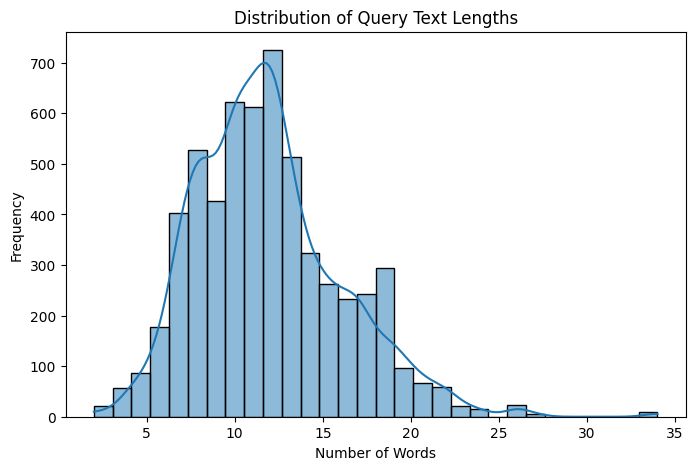

In [153]:
if "query_text" in train_dataset.columns:
    train_dataset["text_length"] = train_dataset["query_text"].apply(lambda x: len(str(x).split()))
    plt.figure(figsize=(8, 5))
    sns.histplot(train_dataset["text_length"], bins=30, kde=True)
    plt.title("Distribution of Query Text Lengths")
    plt.xlabel("Number of Words")
    plt.ylabel("Frequency")
    plt.show()

Средняя длина текста ≈ 12 слов.


Описания достаточно короткие, можно попробовать TF-IDF.

####  EDA для TestImages

In [154]:
if test_images is not None:
    print("\nTestImages Summary:")
    display(test_images.describe())


TestImages Summary:


image
count                         100
unique                        100
top     2346402952_e47d0065b6.jpg
freq                            1

<img src="https://upload.wikimedia.org/wikipedia/commons/b/ba/Warning_sign_4.0.png" align=left width=44, heigth=33>
<div class="alert alert-warning">
    
Опять возвращаюсь к вопросу использования display вместо print.  Сейчас информация выглядит нечитаемой.</div>

<div class="alert" style="background-color:#ead7f7;color:#8737bf">
    <font size="3"><b>комментарий студента</b></font>
   
 Убрала везде print, заменила на display 👌 Также добавила подразделы (написала об этом выше).

</div>

### 1.3. Агрегация оценок

Сделаем следующие шаги:

1) Проведем агрегацию экспертных оценок с голосованием большинства. При этом удаленим неоднозначные записи, где все три эксперта дали разные оценки.
2) Далее сделаем агрегацию краудсорсинговых оценок с весами (эксперты 60%, крауд 40%).


Кроме того,  экспертные оценки (aggregated_expert_rating) находятся в другом масштабе, чем agreement_score, поэтому масштабируем aggregated_expert_rating в [0,1], чтобы он был в том же диапазоне, что и agreement_score.


In [155]:
def aggregate_expert_ratings(row):
    ratings = [row['expert_1'], row['expert_2'], row['expert_3']]
    if len(set(ratings)) == 3:
        return None
    return max(set(ratings), key=ratings.count)

In [156]:
expert_annotations['aggregated_expert_rating'] = expert_annotations.apply(aggregate_expert_ratings, axis=1)

In [157]:
expert_annotations.dropna(subset=['aggregated_expert_rating'], inplace=True)

In [158]:
expert_annotations['scaled_expert_rating'] = (expert_annotations['aggregated_expert_rating'] - 1) / 3

<img src="https://upload.wikimedia.org/wikipedia/commons/b/ba/Warning_sign_4.0.png" align=left width=44, heigth=33>
<div class="alert alert-warning">
Чтобы привести к шкале 0-1 я бы посоветовал использовать линейное преобразование "минус 1 разделить на 3". Формально результат будет тем же самым, но обучение скаллера на всех данных (а не на обучающей выборке) может стать вызвать лишние вопросы, если проект будет в портфолио.
</div>

<div class="alert" style="background-color:#ead7f7;color:#8737bf">
    <font size="3"><b>комментарий студента</b></font>
   
 Убрала MinMaxScaler.

</div>

In [159]:
df = crowd_annotations.merge(expert_annotations, on=["image", "query_id"], how="outer")

In [160]:
df.fillna({"aggregated_expert_rating": df["agreement_score"]}, inplace=True)

In [161]:
missing_values = df.isnull().sum()
missing_percent = (df.isnull().sum() / len(df)) * 100
missing_df = pd.DataFrame({"Missing Values": missing_values, "Percentage": missing_percent})
display(missing_df)

Missing Values  Percentage
image                                  0    0.000000
query_id                               0    0.000000
agreement_score                     3438    6.706068
confirmed_count                     3438    6.706068
rejected_count                      3438    6.706068
expert_1                           45572   88.891490
expert_2                           45572   88.891490
expert_3                           45572   88.891490
aggregated_expert_rating               0    0.000000
scaled_expert_rating               45572   88.891490

Почти 89% значений для оценок экспертов (expert_1, expert_2, expert_3) отсутствуют. weighted_crowd_rating отсутствует в 95% случаев.
agreement_score и связанные с ним confirmed_count, rejected_count имеют примерно 6.7% пропусков. Это говорит о том, что подавляющее большинство данных аннотировано краудсорсерами, а экспертная разметка встречается редко.

In [162]:
df.shape

(51267, 10)

Сделаем фильтрацию низкокачественных крауд-аннотаций:

In [163]:
df_final = df[~((df["agreement_score"] == 0) & (df["rejected_count"] >= 4))]


In [164]:
df_final.shape

(50411, 10)

In [165]:
df_final = df_final.copy()

df_final["agreement_score"] = df_final["agreement_score"].fillna(df_final["agreement_score"].median())
df_final["confirmed_count"] = df_final["confirmed_count"].fillna(df_final["confirmed_count"].median())
df_final["rejected_count"] = df_final["rejected_count"].fillna(df_final["rejected_count"].median())


In [166]:
df_final.loc[:, "aggregated_expert_rating"] = df_final["aggregated_expert_rating"].fillna(df_final["agreement_score"])
df_final.loc[:, "scaled_expert_rating"] = df_final["scaled_expert_rating"].fillna(df_final["aggregated_expert_rating"])

<img src="https://upload.wikimedia.org/wikipedia/commons/thumb/8/81/Stop_sign.png/240px-Stop_sign.png" align=left width=35, heigth=35>
<div class="alert alert-danger">
   
    
В этом проекте есть несколько возможных стратегий работы с обучающими и краудсорс оценками,  вот эти стратегии с плюсами и минусами:
   
    
 - использовать соединение через outer, в этом случае, при корректной обработке пропусков мы можем получить более 50К размеченых пар. К плюсам данного подхода можно отнести большое количество данных. Минус - в основном это будут данные, размеченные краудсорсерами, а там качество раметки ниже.
 - использовать только экспертные оценки. плюс - высокое качество данных (разметка имеет шкалу). Минус - данных меньше.  Поясню по поводу качества разметки на примере: если на изображении одна собака, а в описании "две собаки бегут по берегу", то эксперты поставять соответствие 0,6-0,7 (переводя в шкалу 0-1), а краудсорсеры поставят 0.  Но на экспертных оценках модель хотя-бы научится находить собак, а на краудсор оценках ничему не начится.
    
 - использование соединения через left.  Данный подход очевидно проигрывает второму варианту: данных столько же, нужно дополнительно возиться с объединением, но качество разметки снижается.. Но это соответсвует предложениям авторов проекта, поэтому такой подход имеет право на жизнь
    
 - объединение через inner. Тут все плохо - и данных ОЧЕНЬ мало (в два раза меньше, чем использовать только экспертные оценки) и качество у них "подпорчено". И навыков по обработке пропусков не получаем.....
    
Сейчас ты соединила экспертные и краудсорс оценки, но т.к. использовано соединение через `inner`, то мы просто потеряли половину данных, не получив ничего в замен (точнее только ухудшив наши оценки).
    
Пожалуйста используй любую другую стратегию, кроме внутреннего соединения. Слишком мало данных при этом получается.    
    


</div>

<div class="alert" style="background-color:#ead7f7;color:#8737bf">
    <font size="3"><b>комментарий студента</b></font>
   
 Спасибо за развернутый комментарий! Попробовала первую предложенную стратегию.

 По заполнению пропусков была следующая логика:

 - Сделали фильтрацию низкокачественных крауд-аннотаций (df["agreement_score"] == 0) и (df["rejected_count"] >= 4)

 - Для дискретных и частотных переменных (agreement_score, confirmed_count, rejected_count) использовали медиану, так как это статистически устойчивый способ заполнения.

 - Для экспертных оценок (aggregated_expert_rating, scaled_expert_rating) заполняем данными от краудсорсеров, потому что их оценки могут служить приближением экспертных данных.
</div>

In [167]:
df_final = df_final.copy()

In [168]:
df_final['weighted_crowd_rating'] = (df_final['agreement_score'] * 0.4) + (df_final['scaled_expert_rating'] * 0.6)

In [169]:
print(df_final['weighted_crowd_rating'].min(), df_final['weighted_crowd_rating'].max())


0.0 1.0


In [170]:
missing_values = df_final.isnull().sum()
missing_percent = (df_final.isnull().sum() / len(df)) * 100
missing_df = pd.DataFrame({"Missing Values": missing_values, "Percentage": missing_percent})
display(missing_df)

Missing Values  Percentage
image                                  0    0.000000
query_id                               0    0.000000
agreement_score                        0    0.000000
confirmed_count                        0    0.000000
rejected_count                         0    0.000000
expert_1                           44756   87.299822
expert_2                           44756   87.299822
expert_3                           44756   87.299822
aggregated_expert_rating               0    0.000000
scaled_expert_rating                   0    0.000000
weighted_crowd_rating                  0    0.000000

In [171]:
display(df_final.info())

<class 'pandas.core.frame.DataFrame'>
Index: 50411 entries, 0 to 51266
Data columns (total 11 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   image                     50411 non-null  object 
 1   query_id                  50411 non-null  object 
 2   agreement_score           50411 non-null  float64
 3   confirmed_count           50411 non-null  float64
 4   rejected_count            50411 non-null  float64
 5   expert_1                  5655 non-null   float64
 6   expert_2                  5655 non-null   float64
 7   expert_3                  5655 non-null   float64
 8   aggregated_expert_rating  50411 non-null  float64
 9   scaled_expert_rating      50411 non-null  float64
 10  weighted_crowd_rating     50411 non-null  float64
dtypes: float64(9), object(2)
memory usage: 4.6+ MB


None

In [172]:
display(df_final.describe())

agreement_score  confirmed_count  rejected_count     expert_1  \
count     50411.000000     50411.000000    50411.000000  5655.000000   
mean          0.065244         0.197754        2.807344     1.441202   
std           0.202674         0.614181        0.607121     0.793968   
min           0.000000         0.000000        0.000000     1.000000   
25%           0.000000         0.000000        3.000000     1.000000   
50%           0.000000         0.000000        3.000000     1.000000   
75%           0.000000         0.000000        3.000000     2.000000   
max           1.000000         5.000000        5.000000     4.000000   

          expert_2     expert_3  aggregated_expert_rating  \
count  5655.000000  5655.000000              50411.000000   
mean      1.610256     1.851459                  0.236922   
std       0.860134     0.890665                  0.596583   
min       1.000000     1.000000                  0.000000   
25%       1.000000     1.000000                  0.000000   
50%       1.000000     2.000000                  0.000000   
75%       2.000000     2.000000                  0.000000   
max       4.000000     4.000000                  4.000000   

       scaled_expert_rating  weighted_crowd_rating  
count          50411.000000           50411.000000  
mean               0.079106               0.073561  
std                0.213995               0.206144  
min                0.000000               0.000000  
25%                0.000000               0.000000  
50%                0.000000               0.000000  
75%                0.000000               0.000000  
max                1.000000               1.000000

Аннотаторы не согласны с описаниями изображений, как следствие, имеем низкий agreement_score.

Высокий rejected_count указывает на недоверие к предоставленным описаниям.


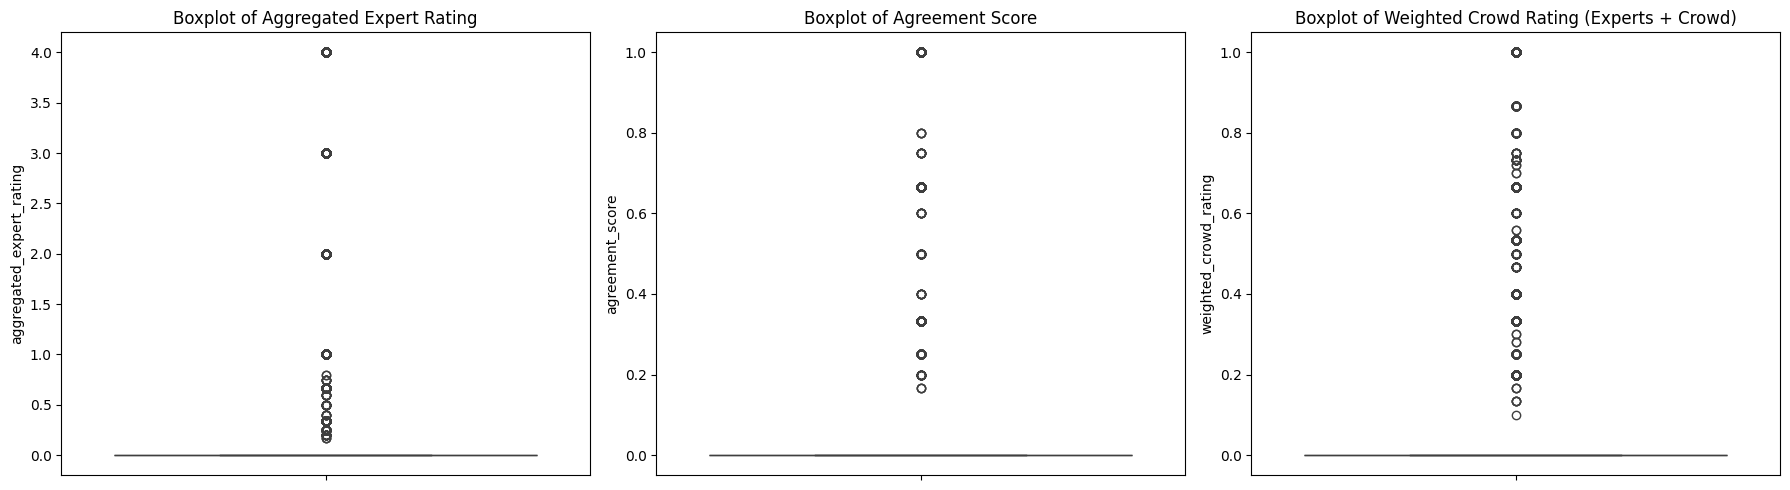

In [173]:
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

sns.boxplot(y=df_final["aggregated_expert_rating"], ax=axes[0])
axes[0].set_title("Boxplot of Aggregated Expert Rating")

sns.boxplot(y=df_final["agreement_score"], ax=axes[1])
axes[1].set_title("Boxplot of Agreement Score")

sns.boxplot(y=df_final["weighted_crowd_rating"], ax=axes[2])
axes[2].set_title("Boxplot of Weighted Crowd Rating (Experts + Crowd)")

plt.tight_layout()
plt.show()


Вывод:

Проведено предварительное ознакомление с данными и предварительная обработка данных, включающая следующие шаги:

1) Масштабированы aggregated_expert_rating в [0,1], чтобы он был в том же диапазоне, что и agreement_score с помощью линейное преобразования.

2) Далее объедены crowd_annotations с expert_annotations с использованмем соединение через outer.

3) Сделана фильтрация низкокачественных крауд-аннотаций (df["agreement_score"] == 0) и (df["rejected_count"] >= 4)

4) Для заполнения пропусков: для дискретных и частотных переменных (agreement_score, confirmed_count, rejected_count) использовали медиану, так как это статистически устойчивый способ заполнения.

Для экспертных оценок (aggregated_expert_rating, scaled_expert_rating) заполняем данными от краудсорсеров, потому что их оценки могут служить приближением экспертных данных.

5) Созданина взвешенной оценки weighted_crowd_rating (60% от экспертов, 40% от крауда).



<img src="https://upload.wikimedia.org/wikipedia/commons/b/ba/Warning_sign_4.0.png" align=left width=44, heigth=33>
<div class="alert alert-warning">
Сейчас ты получила датафрейм, в котором есть единая оценка, собранная из экспертной и крауд оценок.

Для полноценной работы тебе не хватает расшифровки текстового описания по известному query_id. Восстановить его достаточно просто и советую сделать это сейчас и всю дальнейшую работу вести уже с полученным датафреймом (чистку, векторизацию)

Потому что в противном случае ты путаешься в датафреймах и это приводит к дополнительным ошибкам.    

</div>

<div class="alert" style="background-color:#ead7f7;color:#8737bf">
    <font size="3"><b>комментарий студента</b></font>
   Сделала датафрейм df_train ниже.
</div>

In [174]:
df_final_query = df_final.merge(train_dataset[['query_id', 'query_text']], on="query_id", how="left")

In [175]:
missing_descriptions = df_final_query['query_text'].isnull().sum()
print(f"Пропущенные текстовые описания: {missing_descriptions}")

Пропущенные текстовые описания: 1084


In [176]:
df_final_query = df_final_query.dropna(subset=['query_text'])

In [177]:
missing_descriptions = df_final_query['query_text'].isnull().sum()
print(f"Пропущенные текстовые описания: {missing_descriptions}")

Пропущенные текстовые описания: 0


In [178]:
df_train = df_final_query[['weighted_crowd_rating', 'query_text', 'image', 'query_id']]


In [179]:
display(df_train)

weighted_crowd_rating  \
0                    0.000000   
1                    0.000000   
2                    0.000000   
3                    0.000000   
4                    0.000000   
...                       ...   
313886               0.666667   
313887               0.666667   
313888               0.666667   
313889               0.666667   
313890               0.666667   

                                               query_text  \
0               A boy in glasses is wearing a red shirt .   
1               A boy in glasses is wearing a red shirt .   
2               A boy in glasses is wearing a red shirt .   
3               A boy in glasses is wearing a red shirt .   
4               A boy in glasses is wearing a red shirt .   
...                                                   ...   
313886  A person in a red shirt climbing up a rock fac...   
313887  A person in a red shirt climbing up a rock fac...   
313888  A person in a red shirt climbing up a rock fac...   
313889  A person in a red shirt climbing up a rock fac...   
313890  A person in a red shirt climbing up a rock fac...   

                            image                    query_id  
0       1056338697_4f7d7ce270.jpg  114051287_dd85625a04.jpg#2  
1       1056338697_4f7d7ce270.jpg  114051287_dd85625a04.jpg#2  
2       1056338697_4f7d7ce270.jpg  114051287_dd85625a04.jpg#2  
3       1056338697_4f7d7ce270.jpg  114051287_dd85625a04.jpg#2  
4       1056338697_4f7d7ce270.jpg  114051287_dd85625a04.jpg#2  
...                           ...                         ...  
313886   997722733_0cb5439472.jpg  997722733_0cb5439472.jpg#2  
313887   997722733_0cb5439472.jpg  997722733_0cb5439472.jpg#2  
313888   997722733_0cb5439472.jpg  997722733_0cb5439472.jpg#2  
313889   997722733_0cb5439472.jpg  997722733_0cb5439472.jpg#2  
313890   997722733_0cb5439472.jpg  997722733_0cb5439472.jpg#2  

[312807 rows x 4 columns]

## 2. Проверка данных

В некоторых странах, где работает ваша компания, действуют ограничения по обработке изображений: поисковым сервисам и сервисам, предоставляющим возможность поиска, запрещено без разрешения родителей или законных представителей предоставлять любую информацию, в том числе, но не исключительно тексты, изображения, видео и аудио, содержащие описание, изображение или запись голоса детей. Ребёнком считается любой человек, не достигший 16 лет.

В вашем сервисе строго следуют законам стран, в которых работают. Поэтому при попытке посмотреть изображения, запрещённые законодательством, вместо картинок показывается дисклеймер:

> This image is unavailable in your country in compliance with local laws
>

Однако в PoC нет возможности воспользоваться данным функционалом. Поэтому все изображения, которые нарушают данный закон, нужно удалить из обучающей выборки.

In [180]:
def get_wordnet_pos(tag):
    if tag.startswith('J'):
        return wordnet.ADJ
    elif tag.startswith('V'):
        return wordnet.VERB
    elif tag.startswith('N'):
        return wordnet.NOUN
    elif tag.startswith('R'):
        return wordnet.ADV
    else:
        return wordnet.NOUN

In [181]:
def lemmatize(text):
    lemmatizer = WordNetLemmatizer()
    words = word_tokenize(text)
    pos_tags = pos_tag(words)
    lemmatized_text = " ".join(
        lemmatizer.lemmatize(word, get_wordnet_pos(tag)) for word, tag in pos_tags
    )
    return lemmatized_text

In [182]:
def preprocess_text(text):
    if pd.isna(text):
        return ""
    text = re.sub(r'[^a-zA-Z]', ' ', text.lower())
    words = word_tokenize(text)
    stop_words = set(stopwords.words('english'))
    text = ' '.join(word for word in words if word not in stop_words)
    return text

In [183]:
df_train = df_train.copy()
df_train.loc[:, 'preprocessed_text'] = df_train['query_text'].apply(preprocess_text)

In [184]:
df_train = df_train.copy()
df_train.loc[:, 'clean_text'] = df_train['preprocessed_text'].apply(lemmatize)

In [185]:
df_train = df_train.copy()
df_train.drop(columns=["preprocessed_text"], inplace=True)

<img src="https://upload.wikimedia.org/wikipedia/commons/b/ba/Warning_sign_4.0.png" align=left width=44, heigth=33>
<div class="alert alert-warning">

Советую сделать лемматизацию уже сейчас, перед поиском слов, обозначающих детей.
</div>

In [186]:
child_words = ['child',
               'baby',
               'newborn',
               'girl',
               'boy',
               'daughter',
               'son',
               'preschooler',
               'schoolboy',
               'schoolgirl',
               'teenager',
               'young',
               'minor',
               'juvenile',
               'toddler']

<div class="alert" style="background-color:#ead7f7;color:#8737bf">
    <font size="3"><b>комментарий студента</b></font>
   Угу.. сделала выше.
</div>

In [187]:
bad_comments = df_train[df_train['clean_text'].str.contains('|'.join(child_words), case=False, na=False)]

In [188]:
bad_images = bad_comments['query_id'].str[:-2].unique()
bad_images_set = set(bad_images)

In [189]:
initial_count = len(df_train)
df_train_final = df_train[~df_train["image"].isin(bad_images_set)]
final_count = len(df_train_final)
removed_percentage = ((initial_count - final_count) / initial_count) * 100

In [190]:
print(f"Удалено {removed_percentage:.2f}% данных")

Удалено 30.98% данных


In [191]:
print("До удаления изображений:", df_train["image"].nunique())
print("После удаления изображений:", df_train_final["image"].nunique())

До удаления изображений: 1000
После удаления изображений: 669


<img src="https://upload.wikimedia.org/wikipedia/commons/thumb/8/81/Stop_sign.png/240px-Stop_sign.png" align=left width=35, heigth=35>
<div class="alert alert-danger">
Удаление почти 80% изображений - это серьезная проблема. По опыту работу с этим проектом скажу, что в среднем на этом этапе фильтруется до 30% изображений.

и если внимательно посмотреть на код создания `images_to_remove`, то становится понятным где ошибка.  Ты объявляешь "проблемными" все изображения, в паре с которыми встречается слово, обозначающее ребенка.
    
Но ведь мы помним, что в парах далеко не все изображения соответствуют описаниям.
    
-------------------------------------
    
В этом проекте есть два способа определить изображения, содержащие детей
    
    
 - Определить список плохих изображений, как изображения удовлетворяющие условиям:
    - Комментарий содержит плохие слова
    - <b>Оценка соответствия комментария и изображения выше порога.</b>
 - Удалить из нашего датасета все пары "изображение/описание" с плохими изображениями.
    

И второй, очень красивый способ. Он основан на том, что `query_id` содержит в с себе имя изображения, для которого он был написан (такая пасхалочка от авторов датасета).
    
 - Определить список плохих комментариев
 - У `query_id`  плохих комментариев отрезать два последних символа и получим список плохих изображений.
    
        

</div>

<div class="alert" style="background-color:#ead7f7;color:#8737bf">
    <font size="3"><b>комментарий студента</b></font>
   Попыталась реализовать второй способ. Надеюсь, что правильно 😔.
</div>

<img src="https://upload.wikimedia.org/wikipedia/commons/thumb/8/81/Stop_sign.png/240px-Stop_sign.png" align=left width=35, heigth=35>
<div class="alert alert-danger">
    
При запуске кода в окружении с другими базовыми путями здесь будет ошибка.  Пожалуйста используй переменные, которые у тебя уже определены или собери пути с использованием `base_path`

-------------------
    
Я не буду дублировать этот комментарий, но пожалуйста исправь хардкод путей во всем проекте. При попытке запустить его на своих данных приходится постоянно править код руками, что неправильно.
    
Структура проекта должна быть такой, чтобы при "переезде" на новую машину (или изменении пути к датасету) было бы достаточно изменить путь к данным всего в оном месте, но не в 20 местах, раскиданных по проекту.

</div>


<div class="alert" style="background-color:#ead7f7;color:#8737bf">
    <font size="3"><b>комментарий студента</b></font>
   Убрала 👌.
</div>

<img src="https://upload.wikimedia.org/wikipedia/commons/thumb/8/81/Stop_sign.png/240px-Stop_sign.png" align=left width=35, heigth=35>
<div class="alert alert-danger">
    
я не буду больше дублировать этот комментарий, но пожалуйста не используй print для печати датафреймов

</div>


<div class="alert" style="background-color:#ead7f7;color:#8737bf">
    <font size="3"><b>комментарий студента</b></font>
   Убрала 👌.
</div>

<img src="https://upload.wikimedia.org/wikipedia/commons/thumb/8/81/Stop_sign.png/240px-Stop_sign.png" align=left width=35, heigth=35>
<div class="alert alert-danger">
Прежде чем заполнять нулями давай поймем, откуда взялись пропуски?

Они взялись из-за того, что ты использовала соединение inner и для этих пар не было какой-либо оценки (экспертной или крауд) и они просто не вошли в пересечение.
    
Заполнять нулями точно нельзя, мы автоматически вносим искажение почти в половину данных.
    
Было бы разумным удалить пропуски. Но учитывая мои рекомендации надеюсь что пропусков на этом этапе уже не будет.    
    
</div>

<div class="alert" style="background-color:#ead7f7;color:#8737bf">
    <font size="3"><b>комментарий студента</b></font>
   Убрала 👌. Пропусков нет.
</div>

In [192]:
missing_values = df_train_final.isnull().sum()
missing_percent = (df_train_final.isnull().sum() / len(df)) * 100
missing_df = pd.DataFrame({"Missing Values": missing_values, "Percentage": missing_percent})
display(missing_df)

Missing Values  Percentage
weighted_crowd_rating               0         0.0
query_text                          0         0.0
image                               0         0.0
query_id                            0         0.0
clean_text                          0         0.0

In [355]:
test_queries['preprocessed_text'] = test_queries['query_text'].apply(preprocess_text)

Из test_queries нельзя также показывать изображения детей:

In [356]:
test_queries['clean_text'] = test_queries['preprocessed_text'].apply(lemmatize)

In [358]:
bad_comments_test = test_queries[test_queries['clean_text'].str.contains('|'.join(child_words), case=False, na=False)]

In [359]:
bad_images_test = bad_comments_test['query_id'].str[:-2].unique()
bad_images_set_test = set(bad_images_test)

In [360]:
initial_count_test = len(test_queries)
df_test_final = test_queries[~test_queries["image"].isin(bad_images_set_test)]
final_count_test = len(df_test_final)
removed_percentage_test = ((initial_count_test - final_count_test) / initial_count_test) * 100

In [362]:
print(f"Удалено {removed_percentage_test:.2f}% данных")

Удалено 47.00% данных


Вывод раздела 2:

Для того, чтобы сделать фильтрацию первоночально проведны следующие преобразования:
- Преобразование в строчные буквы;
- Поскольку наш текст в основном на английском языке, использован WordNetLemmatizer из NLTK, с использованием тегов POS (Part-of-Speech) для точной лемматизации.
- Создан словать с "плохими" словами.
- Далее были получаем "плохие" изображения. Поскольку query_id содержит имя изображения, откуда были  извлечены названия изображения, которые скорее всего содержат нежелательный контент.

Таким образом, удалено 30.98% данных



## 3. Векторизация изображений

Перейдём к векторизации изображений.

Самый примитивный способ — прочесть изображение и превратить полученную матрицу в вектор. Такой способ нам не подходит: длина векторов может быть сильно разной, так как размеры изображений разные. Поэтому стоит обратиться к свёрточным сетям: они позволяют "выделить" главные компоненты изображений. Как это сделать? Нужно выбрать какую-либо архитектуру, например ResNet-18, посмотреть на слои и исключить полносвязные слои, которые отвечают за конечное предсказание. При этом можно загрузить модель данной архитектуры, предварительно натренированную на датасете ImageNet.

In [193]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

In [203]:
resnet18 = models.resnet18(pretrained=True)
resnet18 = torch.nn.Sequential(*list(resnet18.children())[:-1])
resnet18.eval()

/usr/local/lib/python3.11/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet18_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet18_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


Sequential(
  (0): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (2): ReLU(inplace=True)
  (3): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (4): Sequential(
    (0): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    )
    (1): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (conv2): Con

### 3.1 Векторизация изображений в train_image

In [204]:
image_folder = image_paths["TrainImages"][0]

In [205]:
num_unique_images = df_train_final["image"].nunique()
print("Количество уникальных изображений:", num_unique_images)

Количество уникальных изображений: 669


In [206]:
valid_images = set(df_train_final["image"].unique())

In [198]:
output_vectors = {}

In [199]:
transform = transforms.Compose([
    transforms.Resize(256),
    transforms.CenterCrop(224),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225]),
])

In [207]:
def preprocess_image(img_path):
    img = Image.open(img_path).convert("RGB")
    img_tensor = transform(img).unsqueeze(0)
    return img_tensor

In [208]:
for img_name in tqdm(os.listdir(image_folder), desc="Processing Images"):
    if img_name not in valid_images:
        continue

    img_path = os.path.join(image_folder, img_name)

    try:
        img_tensor = preprocess_image(img_path)

        with torch.no_grad():
            vector = resnet18(img_tensor)

        vector = vector.squeeze().cpu().numpy()

        output_vectors[img_name] = vector

    except Exception as e:
        print(f"Ошибка обработки {img_name}: {e}")

print(f"🔹 Векторизовано {len(output_vectors)} изображений.")

Processing Images:   0%|          | 0/1000 [00:00<?, ?it/s]

🔹 Векторизовано 669 изображений.


<img src="https://upload.wikimedia.org/wikipedia/commons/b/ba/Warning_sign_4.0.png" align=left width=44, heigth=33>
<div class="alert alert-warning">
    
Похоже прогресс-бар работает ужасно...  Попробуй спользовать вот такой вариант импорта
    
```python    
from tqdm.notebook import tqdm
    
```
</div>

<div class="alert" style="background-color:#ead7f7;color:#8737bf">
    <font size="3"><b>комментарий студента</b></font>
   Вроде теперь ок работает 👌.
</div>

<img src="https://upload.wikimedia.org/wikipedia/commons/b/ba/Warning_sign_4.0.png" align=left width=44, heigth=33>
<div class="alert alert-warning">
Я бы не стал векторизовать все изображения, ведь некоторые из них содержат детей и уже были исключены из датасета
</div>

<div class="alert" style="background-color:#ead7f7;color:#8737bf">
    <font size="3"><b>комментарий студента</b></font>
   Добавила выше valid_images = set(df_train_final["image"].unique()) 👌.
</div>

<img src="https://upload.wikimedia.org/wikipedia/commons/b/ba/Warning_sign_4.0.png" align=left width=44, heigth=33>
<div class="alert alert-warning">
А еще стоит обратить внимание, что изображения у нас не квадратные, а значит они будут сжаты до квадратов с изменением пропорций.
    
В прекоде, который был дан в теории для pytorch модели эта проблема быларешена тем, что мы вырезали квадрат из середины и работали уже с ним.
    
Думаю что что-то подобное стоит попробовать и при использовании keras.    
</div>

<div class="alert" style="background-color:#ead7f7;color:#8737bf">
    <font size="3"><b>комментарий студента</b></font>
   Не нашла аналога в keras...
</div>

<img src="https://upload.wikimedia.org/wikipedia/commons/b/ba/Warning_sign_4.0.png" align=left width=44, heigth=33>
<div class="alert alert-warning">
Чтобы модель во время предсказания не выводила отдельный прогресс-бар для каждого изображения можно использовать параметр verbose=False</div>

In [209]:
df_vectors = pd.DataFrame.from_dict(output_vectors, orient='index')

In [210]:
display(df_vectors)

0         1         2         3         4    \
512101751_05a6d93e19.jpg   0.321408  1.238798  0.763462  0.096673  3.213030   
3344233740_c010378da7.jpg  0.737594  3.913715  1.719851  0.219353  0.399412   
421730441_6b2267fd31.jpg   0.086767  1.065883  2.609456  1.312492  0.183690   
3523474077_16e14bc54c.jpg  1.578709  0.855409  0.896659  0.823521  0.430666   
3203908917_53e53c03d1.jpg  0.462883  0.412084  0.917025  3.397386  1.145057   
...                             ...       ...       ...       ...       ...   
244571201_0339d8e8d1.jpg   0.303185  0.111801  0.259201  1.858023  0.726509   
3191135894_2b4bdabb6d.jpg  0.542886  1.688834  0.405104  0.137902  1.033864   
3099923914_fd450f6d51.jpg  0.169618  1.874054  1.891018  0.966358  0.141440   
2431832075_00aa1a4457.jpg  0.088163  0.915395  1.227419  0.442936  0.113144   
293327462_20dee0de56.jpg   0.188311  1.912215  1.952684  1.279096  1.544371   

                                5         6         7         8         9    \
512101751_05a6d93e19.jpg   0.267158  0.388061  0.864130  0.730318  3.140759   
3344233740_c010378da7.jpg  2.083333  0.786716  1.906829  0.264630  0.115959   
421730441_6b2267fd31.jpg   0.121508  0.808021  0.317506  0.908288  0.437499   
3523474077_16e14bc54c.jpg  0.760477  1.147865  0.291271  2.334964  1.046961   
3203908917_53e53c03d1.jpg  0.722984  1.969049  1.694909  0.161265  0.187232   
...                             ...       ...       ...       ...       ...   
244571201_0339d8e8d1.jpg   0.075776  0.488563  5.731820  0.077236  0.750242   
3191135894_2b4bdabb6d.jpg  0.499821  0.841580  0.003160  0.000000  1.485084   
3099923914_fd450f6d51.jpg  0.107799  0.401512  0.097713  0.314387  1.036073   
2431832075_00aa1a4457.jpg  0.520838  0.314209  1.183530  2.811816  0.378080   
293327462_20dee0de56.jpg   0.581852  0.507218  0.760813  1.044145  2.654411   

                           ...       502       503       504       505  \
512101751_05a6d93e19.jpg   ...  0.671013  0.467817  0.936622  0.452252   
3344233740_c010378da7.jpg  ...  1.315963  0.747393  0.571768  1.185372   
421730441_6b2267fd31.jpg   ...  0.431644  0.400693  0.278428  0.488813   
3523474077_16e14bc54c.jpg  ...  1.069892  2.937629  1.236377  0.490957   
3203908917_53e53c03d1.jpg  ...  0.629723  0.347207  0.386889  0.377936   
...                        ...       ...       ...       ...       ...   
244571201_0339d8e8d1.jpg   ...  0.029346  0.931816  2.705643  0.273551   
3191135894_2b4bdabb6d.jpg  ...  0.334913  1.008024  0.538189  0.130989   
3099923914_fd450f6d51.jpg  ...  0.647177  2.406191  0.851805  0.203715   
2431832075_00aa1a4457.jpg  ...  0.290675  0.798834  0.836735  0.653399   
293327462_20dee0de56.jpg   ...  0.838611  0.291132  0.023306  1.247284   

                                506       507       508       509       510  \
512101751_05a6d93e19.jpg   0.493928  1.615007  0.995739  1.131477  0.201179   
3344233740_c010378da7.jpg  0.839563  2.202479  1.095025  1.726044  1.714697   
421730441_6b2267fd31.jpg   1.182144  0.644108  1.341782  0.001183  0.318296   
3523474077_16e14bc54c.jpg  0.574596  1.470252  1.514216  1.302821  2.036250   
3203908917_53e53c03d1.jpg  1.549796  2.215430  0.399635  2.404776  1.121751   
...                             ...       ...       ...       ...       ...   
244571201_0339d8e8d1.jpg   0.344283  0.757069  0.856381  1.565469  4.304267   
3191135894_2b4bdabb6d.jpg  0.096101  0.917105  1.457261  0.154742  0.153105   
3099923914_fd450f6d51.jpg  1.532906  0.634285  0.312584  0.005443  0.233129   
2431832075_00aa1a4457.jpg  1.444200  1.619119  0.565667  0.628454  1.041130   
293327462_20dee0de56.jpg   1.064688  0.168245  1.876533  0.315272  0.340872   

                                511  
512101751_05a6d93e19.jpg   0.195992  
3344233740_c010378da7.jpg  0.458371  
421730441_6b2267fd31.jpg   0.718208  
3523474077_16e14bc54c.jpg  0.967058  
3203908917_53e53c03d1.jpg  2.008405  
...                             ...  
244571201_0339d8e8d1.jpg   1.4

<img src="https://emojigraph.org/media/apple/check-mark-button_2705.png" align=left width=33, heigth=33>
<div class="alert alert-success">
 Отлично, вектра для изображений получены👍 </div>

<img src="https://upload.wikimedia.org/wikipedia/commons/thumb/8/81/Stop_sign.png/240px-Stop_sign.png" align=left width=35, heigth=35>
<div class="alert alert-danger">
    
Я перезапускал твой код и размерность этого датафрейма 1000 изображений</div>

In [211]:
df_vectors.shape

(669, 512)

<div class="alert" style="background-color:#ead7f7;color:#8737bf">
    <font size="3"><b>комментарий студента</b></font>
   Теперь должно быть 669 изображений
</div>

### 3.2 Векторизация изображений в test_image

In [364]:
image_folder = image_paths["TestImages"][0]

In [373]:
df_test_final = df_test_final.copy()

df_test_final["image"] = df_test_final["image"].apply(lambda x: os.path.basename(x))

valid_images = set(df_test_final["image"].unique())

In [372]:
output_vectors_test = {}

for img_name in tqdm(os.listdir(image_folder), desc="Processing Test Images"):
    if img_name not in valid_images:
        continue

    img_path = os.path.join(image_folder, img_name)

    try:
        img_tensor = preprocess_image(img_path)

        with torch.no_grad():
            vector = resnet18(img_tensor)

        vector = vector.squeeze().cpu().numpy()

        output_vectors_test[img_name] = vector

    except Exception as e:
        print(f"Ошибка обработки {img_name}: {e}")

print(f"🔹 Векторизовано {len(output_vectors_test)} тестовых изображений.")

Processing Test Images:   0%|          | 0/100 [00:00<?, ?it/s]

🔹 Векторизовано 53 тестовых изображений.


In [375]:
df_test_vectors = pd.DataFrame.from_dict(output_vectors_test, orient='index')

df_test_vectors.shape

(53, 512)

Вывод раздела 3:

Осуществлена векторизация изображений в train_images и test_image.

Для векторизации изображений мы используем resnet18 для train_images, с нормализацию и обрезку, при этом осуществляется фильтрация valid_images, которая  позволяет векторизовать только нужные изображения из train_images.



## 4. Векторизация текстов

Следующий этап — векторизация текстов. Вы можете поэкспериментировать с несколькими способами векторизации текстов:

- tf-idf
- word2vec
- \*трансформеры (например Bert)

Будем использовать BERT.

### 4.1 Векторизация текстов в train

Поскольку мы уже лемматизировали train выше, перейдем к векторизации:

In [213]:
bert_model = SentenceTransformer("all-MiniLM-L6-v2")

/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


modules.json:   0%|          | 0.00/349 [00:00<?, ?B/s]

config_sentence_transformers.json:   0%|          | 0.00/116 [00:00<?, ?B/s]

README.md:   0%|          | 0.00/10.7k [00:00<?, ?B/s]

sentence_bert_config.json:   0%|          | 0.00/53.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/612 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/90.9M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/350 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/112 [00:00<?, ?B/s]

1_Pooling%2Fconfig.json:   0%|          | 0.00/190 [00:00<?, ?B/s]

In [214]:
text_embeddings = {}

In [215]:
for idx, text in tqdm(zip(df_train_final['query_id'], df_train_final['clean_text']), desc="Processing Texts"):
    if isinstance(text, str) and len(text) > 2:
        embedding = bert_model.encode(text)
        text_embeddings[idx] = embedding
    else:
        text_embeddings[idx] = np.zeros(768)

Processing Texts: 0it [00:00, ?it/s]

In [216]:
df_text_vectors = pd.DataFrame.from_dict(text_embeddings, orient='index')

In [217]:
display(df_text_vectors)

0         1         2         3         4    \
114051287_dd85625a04.jpg#2  -0.023122  0.032630 -0.063258 -0.038351  0.041199   
1427391496_ea512cbe7f.jpg#2 -0.060484  0.052463  0.026008 -0.009435  0.000540   
2073964624_52da3a0fc4.jpg#2 -0.037061  0.066420 -0.003388  0.030854  0.050732   
2083434441_a93bc6306b.jpg#2  0.061223 -0.018541  0.036612  0.005587 -0.098270   
2204550058_2707d92338.jpg#2  0.013284 -0.010148  0.044197 -0.034182  0.111500   
...                               ...       ...       ...       ...       ...   
3348385580_10b53391f9.jpg#2 -0.070450 -0.047877  0.052953  0.061048  0.002314   
3585598356_8ce815bbb9.jpg#2 -0.095461 -0.061925  0.012291 -0.035340  0.021950   
1096395242_fc69f0ae5a.jpg#2 -0.016037  0.126708  0.009812 -0.112658  0.092963   
3108732084_565b423162.jpg#2 -0.077725 -0.018967 -0.017178  0.014807 -0.020849   
424779662_568f9606d0.jpg#2   0.009693  0.022655 -0.004713 -0.069505  0.005095   

                                  5         6         7         8         9    \
114051287_dd85625a04.jpg#2   0.008815  0.144473 -0.012553 -0.064446 -0.098969   
1427391496_ea512cbe7f.jpg#2  0.035143  0.069009  0.047552 -0.059020 -0.002318   
2073964624_52da3a0fc4.jpg#2  0.042375  0.066119 -0.025203  0.017083 -0.006699   
2083434441_a93bc6306b.jpg#2  0.050980  0.046034 -0.014633 -0.048572 -0.049053   
2204550058_2707d92338.jpg#2 -0.015348  0.064692  0.029146  0.000154  0.063527   
...                               ...       ...       ...       ...       ...   
3348385580_10b53391f9.jpg#2 -0.024474 -0.002730  0.078452 -0.049193 -0.027905   
3585598356_8ce815bbb9.jpg#2  0.029919  0.032745 -0.052519 -0.039645 -0.070607   
1096395242_fc69f0ae5a.jpg#2  0.022348  0.011302  0.060705  0.003778  0.041555   
3108732084_565b423162.jpg#2 -0.014592  0.097918  0.106163  0.015653 -0.006954   
424779662_568f9606d0.jpg#2   0.016469 -0.020506 -0.113641  0.022959 -0.010103   

                             ...       374       375       376       377  \
114051287_dd85625a04.jpg#2   ... -0.031412 -0.071627  0.004862  0.066086   
1427391496_ea512cbe7f.jpg#2  ...  0.109247  0.081286  0.024104  0.058692   
2073964624_52da3a0fc4.jpg#2  ... -0.094180  0.005526  0.010287 -0.009778   
2083434441_a93bc6306b.jpg#2  ... -0.098086  0.057650  0.013477 -0.048479   
2204550058_2707d92338.jpg#2  ... -0.068206 -0.012529 -0.026800  0.012674   
...                          ...       ...       ...       ...       ...   
3348385580_10b53391f9.jpg#2  ...  0.046797  0.050982 -0.024862 -0.032439   
3585598356_8ce815bbb9.jpg#2  ... -0.125103 -0.012094  0.006210  0.076691   
1096395242_fc69f0ae5a.jpg#2  ...  0.051931 -0.086686  0.054777  0.020264   
3108732084_565b423162.jpg#2  ...  0.008105  0.078722 -0.024878 -0.035346   
424779662_568f9606d0.jpg#2   ... -0.112759 -0.026478 -0.040605  0.019970   

                                  378       379       380       381       382  \
114051287_dd85625a04.jpg#2  -0.012011  0.053533  0.058102  0.007418 -0.014180   
1427391496_ea512cbe7f.jpg#2  0.003896  0.040067 -0.026154  0.073717  0.007473   
2073964624_52da3a0fc4.jpg#2 -0.100295  0.036102 -0.084281 -0.046676  0.004592   
2083434441_a93bc6306b.jpg#2 -0.057123  0.033935 -0.030574 -0.025211  0.044295   
2204550058_2707d92338.jpg#2  0.065931  0.011159 -0.055069  0.014639 -0.062137   
...                               ...       ...       ...       ...       ...   
3348385580_10b53391f9.jpg#2 -0.071264 -0.068203 -0.064245 -0.109880 -0.093049   
3585598356_8ce815bbb9.jpg#2 -0.019388  0.068760 -0.044449 -0.063458  0.056698   
1096395242_fc69f0ae5a.jpg#2  0.076461  0.047542  0.086257  0.041681 -0.098543   
3108732084_565b423162.jpg#2 -0.106885 -0.051949 -0.022944 -0.046819 -0.092683   
424779662_568f9606d0.jpg#2   0.010582 -0.014936 -0.016647 -0.052837  0.103798   

                                  383  
114051287_dd85625a04.jpg#2   0.011675  
1427391496_ea512cbe7f.jpg#2  0.083689  
2073964624_52da3a0fc4.jpg#2 -0.093371  
2083434441_a93bc6306b.jpg#2 -0.100178  
22

<img src="https://emojigraph.org/media/apple/check-mark-button_2705.png" align=left width=33, heigth=33>
<div class="alert alert-success">
 👍 Вектора для текста получены с помощью TF-IDF. Здесь конечно есть очень тонкий момент, и в другом проекте это мог бы быть красный комментарий. Ты же помнишь, что векторайзеры мы обучаем на обучающем датасете и применяем к валидационому и тестовому. А сейчас вектора рассчитаны с использованием всех частей датасета.  Но для этого проекта это должно быть допустимо, т.к. .утечка,повышающая оценку на валидации врядли что-то сильно  испортит.

-----------
    
Что касается выбранного подхода. По моим наблюдения используя TfidfVectorizer крайне редко получается обучить толковую модель.  Я бы советовал все-таки использовать "плотные" вектора полученные с помощью BERT    

</div>

<img src="https://upload.wikimedia.org/wikipedia/commons/b/ba/Warning_sign_4.0.png" align=left width=44, heigth=33>
<div class="alert alert-warning">
А вот вектора для тестовых изображений заранее считать не нужно. Лучше делать это "на лету" при получении запроса от пользователя.    
    
</div>

<div class="alert" style="background-color:#ead7f7;color:#8737bf">
    <font size="3"><b>комментарий студента</b></font>
 убрала
</div>

Вывод раздела:
Для датафрейма train_images выполнены следующие шаги:
- Вычисление векторов с использование BERT.


## 5. Объединение векторов¶


### 5.1 Объединение векторов train

Подготовьте данные для обучения: объедините векторы изображений и векторы текстов с целевой переменной.

In [220]:
df_text_vectors = df_text_vectors.reset_index()

In [222]:
print(f"Количество дубликатов: {df_text_vectors.duplicated().sum()}")

Количество дубликатов: 0


In [223]:
df_text_vectors.shape

(977, 385)

In [230]:
df_text_vectors.rename(columns={"index": "query_id"}, inplace=True)
df_text_vectors.head(2)

query_id         0         1         2         3  \
0   114051287_dd85625a04.jpg#2 -0.023122  0.032630 -0.063258 -0.038351   
1  1427391496_ea512cbe7f.jpg#2 -0.060484  0.052463  0.026008 -0.009435   

          4         5         6         7         8  ...       374       375  \
0  0.041199  0.008815  0.144473 -0.012553 -0.064446  ... -0.031412 -0.071627   
1  0.000540  0.035143  0.069009  0.047552 -0.059020  ...  0.109247  0.081286   

        376       377       378       379       380       381       382  \
0  0.004862  0.066086 -0.012011  0.053533  0.058102  0.007418 -0.014180   
1  0.024104  0.058692  0.003896  0.040067 -0.026154  0.073717  0.007473   

        383  
0  0.011675  
1  0.083689  

[2 rows x 385 columns]

In [224]:
df_train_final.shape

(215914, 5)

In [225]:
df_text_vectors.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 977 entries, 0 to 976
Columns: 385 entries, index to 383
dtypes: float32(384), object(1)
memory usage: 1.4+ MB


In [226]:
df_train_final.info()

<class 'pandas.core.frame.DataFrame'>
Index: 215914 entries, 0 to 312972
Data columns (total 5 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   weighted_crowd_rating  215914 non-null  float64
 1   query_text             215914 non-null  object 
 2   image                  215914 non-null  object 
 3   query_id               215914 non-null  object 
 4   clean_text             215914 non-null  object 
dtypes: float64(1), object(4)
memory usage: 9.9+ MB


#### Объединим df_text_vectors и df_train_final в merged_df

In [231]:
merged_df = df_train_final.merge(df_text_vectors, on="query_id", how="left")

In [232]:
merged_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 215914 entries, 0 to 215913
Columns: 389 entries, weighted_crowd_rating to 383
dtypes: float32(384), float64(1), object(4)
memory usage: 324.5+ MB


In [233]:
merged_df.shape

(215914, 389)

#### Объединим  merged_df c df_vectors

In [234]:
df_vectors.shape

(669, 512)

In [235]:
df_vectors.info()

<class 'pandas.core.frame.DataFrame'>
Index: 669 entries, 512101751_05a6d93e19.jpg to 293327462_20dee0de56.jpg
Columns: 512 entries, 0 to 511
dtypes: float32(512)
memory usage: 1.3+ MB


In [236]:
merged_final = merged_df.merge(df_vectors, left_on="image", right_index=True, how="left")

<img src="https://upload.wikimedia.org/wikipedia/commons/thumb/8/81/Stop_sign.png/240px-Stop_sign.png" align=left width=35, heigth=35>
<div class="alert alert-danger">
    
Очень важно отслеживать результаты преобразований (и тем более объединений) не только с помощью вывода несколкьих строк (head), но и с помощью info().

</div>


In [237]:
merged_final.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 215914 entries, 0 to 215913
Columns: 901 entries, weighted_crowd_rating to 511
dtypes: float32(896), float64(1), object(4)
memory usage: 746.2+ MB


In [238]:
merged_final.shape

(215914, 901)

<div class="alert" style="background-color:#ead7f7;color:#8737bf">
    <font size="3"><b>комментарий студента</b></font>
   Добавила выше.
</div>

<img src="https://upload.wikimedia.org/wikipedia/commons/thumb/8/81/Stop_sign.png/240px-Stop_sign.png" align=left width=35, heigth=35>
<div class="alert alert-danger">
    
Если прямо сейчас ты выведешь info полученного датафрейма, то окажется что количество записей в нем резко увеличилось.
    
    
Причина кротся в том, что в датафрейме text_vectors много дубликатов, и соответственно после соединения мы получаем резко "распухший" датафрейм merged_df

</div>


<img src="https://upload.wikimedia.org/wikipedia/commons/b/ba/Warning_sign_4.0.png" align=left width=44, heigth=33>
<div class="alert alert-warning">
При корректной предобработке пропусков быть не должно. Поэтому если они вдруг есть - нужно разбираться с их причинами (искать ошибки в коде), но не прятать ошибки, заполняя пропуски нулями.

</div>

<img src="https://upload.wikimedia.org/wikipedia/commons/b/ba/Warning_sign_4.0.png" align=left width=44, heigth=33>
<div class="alert alert-warning">
Объединение векторов для тестовых данных не нужно, т.к. на этапе инференса логика работы с данными должна быть другая
</div>

<div class="alert" style="background-color:#ead7f7;color:#8737bf">
    <font size="3"><b>комментарий студента</b></font>
   Убрала объединение векторов для тестовых данных.
</div>

Вывод раздела 5:

были созданы два датафрейма, которые будут использованы в обучении и тестировании merged_df_test и merged_df.

## 6. Обучение модели предсказания соответствия

Для обучения разделите датасет на тренировочную и тестовую выборки. Простое случайное разбиение не подходит: нужно исключить попадание изображения и в обучающую, и в тестовую выборки. Для того чтобы учесть изображения при разбиении, можно воспользоваться классом GroupShuffleSplit из библиотеки sklearn.model_selection.

Код ниже разбивает датасет на тренировочную и тестовую выборки в пропорции 7:3 так, что строки с одинаковым значением 'group_column' будут содержаться либо в тестовом, либо в тренировочном датасете.

from sklearn.model_selection import GroupShuffleSplit
gss = GroupShuffleSplit(n_splits=1, train_size=.7, random_state=42)
train_indices, test_indices = next(gss.split(X=df.drop(columns=['target']), y=df['target'], groups=df['group_column']))
train_df, test_df = df.loc[train_indices], df.loc[test_indices]
Какую модель использовать — выберите самостоятельно. Также вам предстоит выбрать метрику качества либо реализовать свою.

<img src="https://upload.wikimedia.org/wikipedia/commons/thumb/8/81/Stop_sign.png/240px-Stop_sign.png" align=left width=35, heigth=35>
<div class="alert alert-danger">
В этом задании требуется выбрать основную метрику, которую ты будешь оптимизировать. Пожаулуйста выбери метрику и обоснуй свой выбор.  </div>

<div class="alert" style="background-color:#ead7f7;color:#8737bf">
    <font size="3"><b>комментарий студента</b></font>
   Возможно, нам нужно использовать для этой задачи основной метрикой я предлагаю использовать Spearman’s Rank Correlation Coefficient, поскольку мы предсказываем рейтинги изображений на основе текстового описания. Кажется, что это должно работать лучшем, чем MSE, который ориентируется на абсолютные ошибки, Spearman оценивают ранговую зависимость между предсказаниями и истинными значениями. Но проблема в том, что в Keras, как оказалось, нет встроенной функции для Spearman’s Rank Correlation Coefficient как loss или metric, что, в целом, наверное логично, это ранговая корреляции и не является дифференцируемой функцией, поэтому его сложно использовать в градиентном спуске, поэтому я буду использовать MSE.

</div>

In [239]:
RANDOM_STATE = 42

In [240]:
TRAIN_SIZE = 0.7

In [241]:
group_column = 'image'

In [284]:
gss = GroupShuffleSplit(n_splits=1, train_size=TRAIN_SIZE , random_state=RANDOM_STATE)

<img src="https://emojigraph.org/media/apple/check-mark-button_2705.png" align=left width=33, heigth=33>
<div class="alert alert-success">
Отлично, благодаря использованию GroupShuffleSplit ты исключаешь попадание одного изображения в обучающий и валидационный наборы.</div>

In [243]:
train_indices, valid_indices = next(gss.split(X=merged_final.drop(columns=['weighted_crowd_rating']),
                                              y=merged_final['weighted_crowd_rating'],
                                              groups=merged_final[group_column]))

<img src="https://upload.wikimedia.org/wikipedia/commons/b/ba/Warning_sign_4.0.png" align=left width=44, heigth=33>
<div class="alert alert-warning">
Только давай разберемся с выборками. Финальное тестирование (визуальное) мы делаем на отложенной выборке. Поэтому выборка,которую ты сейчас отделил играет роль валидационной. Есть смысл в её названии использовать слово valid а не test</div>

<div class="alert" style="background-color:#ead7f7;color:#8737bf">
    <font size="3"><b>комментарий студента</b></font>
  переименовала 👌
</div>

In [285]:
train_df, valid_df = merged_final.loc[train_indices], merged_final.loc[valid_indices]

In [286]:
train_df.columns = train_df.columns.astype(str)
valid_df.columns = valid_df.columns.astype(str)

In [287]:
X_train = train_df.drop(columns=['weighted_crowd_rating'])
y_train = train_df['weighted_crowd_rating']
X_valid = valid_df.drop(columns=['weighted_crowd_rating'])
y_valid = valid_df['weighted_crowd_rating']

In [288]:
text_columns = ['query_text', 'image', 'query_id', 'clean_text']

In [289]:
X_train_numeric = X_train.drop(columns=text_columns, errors='ignore')
X_valid_numeric = X_valid.drop(columns=text_columns, errors='ignore')

In [290]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_numeric)
X_valid_scaled = scaler.transform(X_valid_numeric)

#### Бейзлайн — DummyRegressor

In [291]:
dummy_model = DummyRegressor(strategy="mean")

In [292]:
dummy_model.fit(X_train_scaled, y_train)

DummyRegressor()

In [293]:
y_pred_dummy = dummy_model.predict(X_valid_scaled)

In [294]:
y_pred_dummy += np.random.normal(0, 0.01, size=y_pred_dummy.shape)

In [262]:
dummy_mse = mean_squared_error(y_valid, y_pred_dummy)

In [295]:
print("="*50)
print(f"DummyRegressor (Бейзлайн)")
print(f"MSE: {dummy_mse:.4f}")
print("="*50)

DummyRegressor (Бейзлайн)
MSE: 0.0530


<img src="https://upload.wikimedia.org/wikipedia/commons/b/ba/Warning_sign_4.0.png" align=left width=44, heigth=33>
<div class="alert alert-warning">
Мы решаем новую задачу и не знаем, наксколько хороши наши метрики и наши модели. Поэтому советую начать с бейзлайна - константной модели (можешь взять простой DummyRegressor).</div>

<div class="alert" style="background-color:#ead7f7;color:#8737bf">
    <font size="3"><b>комментарий студента</b></font>
  добавила 👌
</div>

#### Линейная регрессия

<img src="https://upload.wikimedia.org/wikipedia/commons/thumb/8/81/Stop_sign.png/240px-Stop_sign.png" align=left width=35, heigth=35>
<div class="alert alert-danger">
    
Пожалуйста исследуй линейную регрессию, это явно указано в брифе к проекту.</div>

<div class="alert" style="background-color:#ead7f7;color:#8737bf">
    <font size="3"><b>комментарий студента</b></font>
  добавила ниже 👌 не увидела в брифе этого, там было что-то вроде: "Какую модель использовать — выберите самостоятельно. Также вам предстоит выбрать метрику качества либо реализовать свою."
</div>

In [296]:
linear_model = LinearRegression()

In [297]:
linear_model.fit(X_train_scaled, y_train)

LinearRegression()

In [298]:
y_pred_linear = linear_model.predict(X_valid_scaled)

In [299]:
linear_mse = mean_squared_error(y_valid, y_pred_linear)

In [314]:
print("="*50)
print(f"**Линейная регрессия**")
print(f"MSE: {linear_mse:.4f}")
print("="*50)

**Линейная регрессия**
MSE: 0.0531


 Ошибка (MSE) почти не изменилась, значит, модель пока не смогла существенно улучшить точность предсказаний. В целом, можно попробовать добавить регуляризацию или попробовать нелинейные модели.


#### Нейронная сеть

In [319]:
model = Sequential([
    Dense(1024, activation="relu", input_shape=(X_train_scaled.shape[1],), kernel_regularizer=l2(0.001)),
    BatchNormalization(),
    Dropout(0.4),

    Dense(512, activation="relu", kernel_regularizer=l2(0.001)),
    BatchNormalization(),
    Dropout(0.3),

    Dense(256, activation="relu", kernel_regularizer=l2(0.001)),
    BatchNormalization(),
    Dropout(0.3),

    Dense(128, activation="relu", kernel_regularizer=l2(0.001)),
    BatchNormalization(),
    Dropout(0.2),

    Dense(64, activation="relu", kernel_regularizer=l2(0.001)),

    Dense(1, activation="linear")
])


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


<img src="https://emojigraph.org/media/apple/check-mark-button_2705.png" align=left width=33, heigth=33>
<div class="alert alert-success">
 👍 </div>

In [320]:
model.compile(optimizer=Adam(learning_rate=0.0005), loss="mse", metrics=["mse"])

In [321]:
model.summary()

Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_16 (Dense)                     │ (None, 1024)                │         918,528 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization                  │ (None, 1024)                │           4,096 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_8 (Dropout)                  │ (None, 1024)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_17 (Dense)                     │ (None, 512)                 │         524,800 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_1                │ (None, 512)                 │           2,048 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_9 (Dropout)                  │ (None, 512)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_18 (Dense)                     │ (None, 256)                 │         131,328 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_2                │ (None, 256)                 │           1,024 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_10 (Dropout)                 │ (None, 256)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_19 (Dense)                     │ (None, 128)                 │          32,896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_3                │ (None, 128)                 │             512 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_11 (Dropout)                 │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_20 (Dense)                     │ (None, 64)                  │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_21 (Dense)                     │ (None, 1)                   │              65 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 1,623,553 (6.19 MB)

 Trainable params: 1,619,713 (6.18 MB)

 Non-trainable params: 3,840 (15.00 KB)

In [322]:
history = model.fit(
    X_train_scaled, y_train,
    validation_data=(X_valid_scaled, y_valid),
    epochs=25,
    batch_size=32
)


Epoch 1/25
4724/4724 ━━━━━━━━━━━━━━━━━━━━ 27s 4ms/step - loss: 2.0137 - mse: 0.2212 - val_loss: 0.2055 - val_mse: 0.0571
Epoch 2/25
4724/4724 ━━━━━━━━━━━━━━━━━━━━ 18s 4ms/step - loss: 0.1222 - mse: 0.0504 - val_loss: 0.0704 - val_mse: 0.0492
Epoch 3/25
4724/4724 ━━━━━━━━━━━━━━━━━━━━ 18s 4ms/step - loss: 0.0749 - mse: 0.0509 - val_loss: 0.0675 - val_mse: 0.0497
Epoch 4/25
4724/4724 ━━━━━━━━━━━━━━━━━━━━ 18s 4ms/step - loss: 0.0686 - mse: 0.0498 - val_loss: 0.0685 - val_mse: 0.0500
Epoch 5/25
4724/4724 ━━━━━━━━━━━━━━━━━━━━ 18s 4ms/step - loss: 0.0675 - mse: 0.0492 - val_loss: 0.0663 - val_mse: 0.0491
Epoch 6/25
4724/4724 ━━━━━━━━━━━━━━━━━━━━ 19s 4ms/step - loss: 0.0671 - mse: 0.0489 - val_loss: 0.0646 - val_mse: 0.0482
Epoch 7/25
4724/4724 ━━━━━━━━━━━━━━━━━━━━ 19s 4ms/step - loss: 0.0652 - mse: 0.0478 - val_loss: 0.0628 - val_mse: 0.0458
Epoch 8/25
4724/4724 ━━━━━━━━━━━━━━━━━━━━ 19s 4ms/step - loss: 0.0623 - mse: 0.0455 - val_loss: 0.0616 - val_mse: 0.0461
Epoch 9/25
4724/4724 ━━━━━━━━━━━

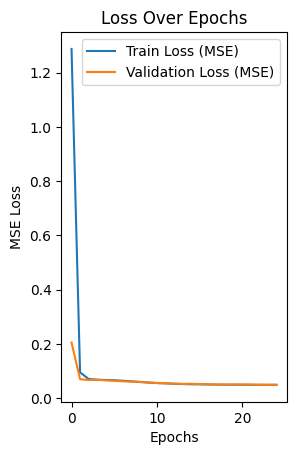

In [323]:
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Train Loss (MSE)')
plt.plot(history.history['val_loss'], label='Validation Loss (MSE)')
plt.xlabel('Epochs')
plt.ylabel('MSE Loss')
plt.title('Loss Over Epochs')
plt.legend()

plt.show()

In [324]:
y_pred_nn = model.predict(X_valid_scaled).squeeze()
nn_mse = mean_squared_error(y_valid, y_pred_nn)

2024/2024 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step


In [325]:
print("=" * 50)
print(f"** Нейронная сеть**")
print(f"📉 MSE: {nn_mse:.4f}")
print("=" * 50)

** Нейронная сеть**
📉 MSE: 0.0448


<img src="https://emojigraph.org/media/apple/check-mark-button_2705.png" align=left width=33, heigth=33>
<div class="alert alert-success">
Да, нейронка обучена, очень информативные графики </div>

Вывод раздела 6:


DummyRegressor (Бейзлайн)
MSE: 0.0530


Линейная регрессия
MSE: 0.0531


MSE: 0.0448

Нейросеть лучше справляется с задачей, но
MSE пока остаётся довольно высоким, возможно, модель можно ещё улучшить.


# 7. Тестирование модели

Настало время протестировать модель. Для этого получите эмбеддинги для всех тестовых изображений из папки test_images, выберите случайные 10 запросов из файла test_queries.csv и для каждого запроса выведите наиболее релевантное изображение. Сравните визуально качество поиска.

In [400]:
def search_best_match(query_text, model, vectorizer, df_test_vectors, scaler, X_train_numeric, top_k=100):

    if not isinstance(query_text, str) or len(query_text) < 3:
        return "⚠️ Некорректный запрос!", None

    lemmatized_query = query_text.lower()

    child_words = {'child', 'baby', 'newborn', 'girl', 'boy', 'daughter', 'son',
                   'preschooler', 'schoolboy', 'schoolgirl', 'teenager', 'young', 'minor', 'juvenile', 'toddler'}

    if any(word in lemmatized_query.split() for word in child_words):
        return "⚠️ Запрос содержит запрещённые слова (например, связанные с детьми).", None


    query_vector = vectorizer.encode([query_text])[0]

    sampled_images = random.sample(list(df_test_vectors.index), min(top_k, len(df_test_vectors)))

    best_score = -np.inf
    best_image = None

    for img_name in tqdm(sampled_images, desc="Processing Images", leave=False):
        try:
            image_vector = df_test_vectors.loc[img_name].values


            combined_vector = np.hstack([query_vector, image_vector]).reshape(1, -1)


            combined_df = pd.DataFrame(combined_vector, columns=X_train_numeric.columns)

            combined_vector_scaled = scaler.transform(combined_df)

            predicted_score = model.predict(combined_vector_scaled, verbose=False)[0, 0]

            if predicted_score > best_score:
                best_score = predicted_score
                best_image = img_name

        except Exception as e:
            print(f"Ошибка обработки {img_name}: {e}")

    return best_image, best_score

In [401]:
def show_image(image_name, image_folder):
    img_path = os.path.join(image_folder, image_name)
    img = Image.open(img_path)
    plt.imshow(img)
    plt.axis("off")
    plt.title(image_name)
    plt.show()

In [348]:
random_queries = test_queries['clean_text'].sample(10, random_state=42).tolist()

🔍 Запрос: group girl gothically dress stand together
⚠️ Некорректный запрос или не найдено подходящее изображение.
🔍 Запрос: woman girl rid downhill sled dog run alongside
⚠️ Некорректный запрос или не найдено подходящее изображение.


Processing Images:   0%|          | 0/53 [00:00<?, ?it/s]

🔍 Запрос: dog run
🎯 Лучшее изображение: 3044359043_627488ddf0.jpg, Оценка: 0.3664


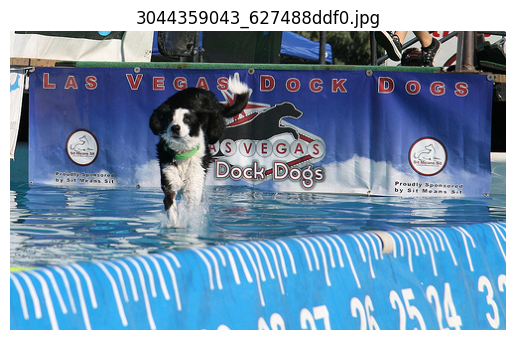

Processing Images:   0%|          | 0/53 [00:00<?, ?it/s]

🔍 Запрос: group people ice skate big city
🎯 Лучшее изображение: 2121140070_a09644550b.jpg, Оценка: 0.1791


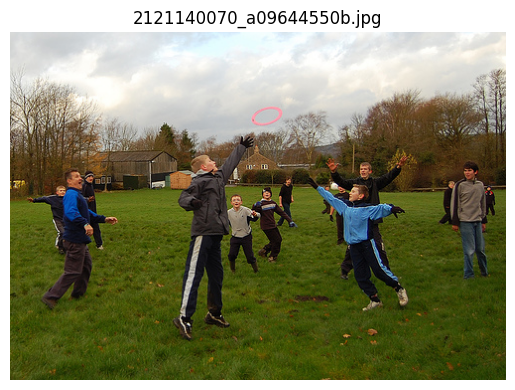

Processing Images:   0%|          | 0/53 [00:00<?, ?it/s]

🔍 Запрос: little kid blue coat hat rid tricycle
🎯 Лучшее изображение: 2121140070_a09644550b.jpg, Оценка: 0.0467


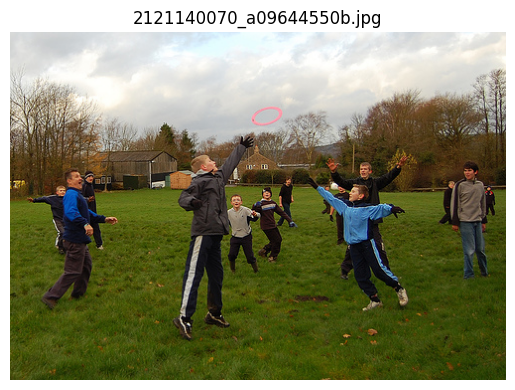

Processing Images:   0%|          | 0/53 [00:00<?, ?it/s]

🔍 Запрос: two black dog fight orange toy
🎯 Лучшее изображение: 2986716822_e220754d32.jpg, Оценка: 0.1244


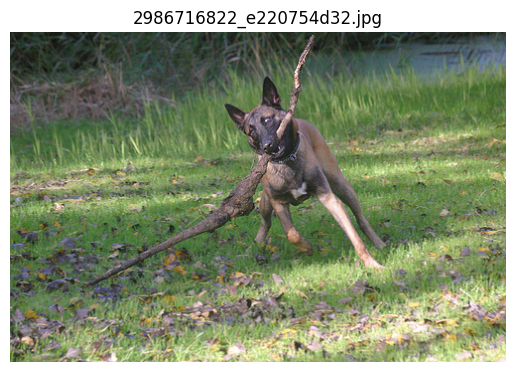

Processing Images:   0%|          | 0/53 [00:00<?, ?it/s]

🔍 Запрос: dog jump tennis ball near ocean
🎯 Лучшее изображение: 2448210587_9fe7ea5f42.jpg, Оценка: 0.2207


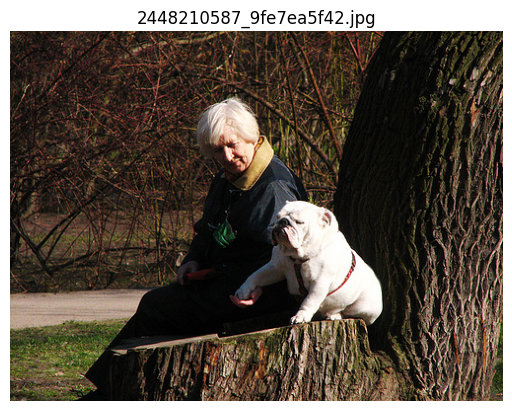

🔍 Запрос: boy fly distant kite
⚠️ Некорректный запрос или не найдено подходящее изображение.


Processing Images:   0%|          | 0/53 [00:00<?, ?it/s]

🔍 Запрос: kid play ultimate frisbee
🎯 Лучшее изображение: 2121140070_a09644550b.jpg, Оценка: 0.0577


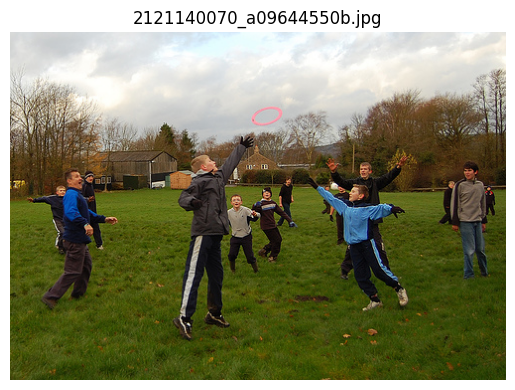

🔍 Запрос: girl purple shirt feed duck
⚠️ Некорректный запрос или не найдено подходящее изображение.


In [402]:
for query in random_queries:
    best_image, score = search_best_match(query, model, bert_model, df_test_vectors, scaler, X_train_numeric)

    print(f"🔍 Запрос: {query}")

    if best_image is None or score is None:
        print("⚠️ Некорректный запрос или не найдено подходящее изображение.")
    else:
        print(f"🎯 Лучшее изображение: {best_image}, Оценка: {score:.4f}")
        show_image(best_image, image_folder)

    print("=" * 60)

<img src="https://upload.wikimedia.org/wikipedia/commons/thumb/8/81/Stop_sign.png/240px-Stop_sign.png" align=left width=35, heigth=35>
<div class="alert alert-danger">
Здесь я попрошу тебя немного переделать логику инференса.
    
Ты уже на финишной прямой курса и во всю ипользуешь функции. Поэтому я попрошу тебя оформить тестирование следующим образом: нужно написать функцию, способную искать изображение по тексту для одного изображения.

  Что должна делаь функция
    
   - Получать текст
   - Возвращать картинку и метрику близости.
   - Выдавать дисклеймер если запрос некорректный
    
А затем нужно 10 раз применить функцию к 10 случайным запросам.   
    
Т.е. функция должна работать с любым запросом. Поэтому векторизацию запроса мы делаем в теле функции. А вот векторизацию изображений лучше сделать заранее.
    
Внутри функции должны выполняться векторизация текста + получение 100 пар (вектор текста + вектор изображения). Для каждой пары получаем предсказание модели и выбираем пару с наивысшей оценкой соотвтствия.</div>

<div class="alert" style="background-color:#ead7f7;color:#8737bf">
    <font size="3"><b>комментарий студента</b></font>
 полностью передалала выше... 👆  
</div>

<img src="https://upload.wikimedia.org/wikipedia/commons/thumb/8/81/Stop_sign.png/240px-Stop_sign.png" align=left width=35, heigth=35>
<div class="alert alert-danger">
Что это?</div>

<div class="alert" style="background-color:#ead7f7;color:#8737bf">
    <font size="3"><b>комментарий студента</b></font>
  удалила
</div>

Вывод раздела 7:

В целом, модель стала предсказывать лучше.

<img src="http://s3.amazonaws.com/pix.iemoji.com/images/emoji/apple/ios-12/256/waving-hand.png" align=left width=44, heigth=44>
<div class="alert alert-info">
<b> Идеи и альтернативные подходы</b>
  Если хочешь получить хорошо работающее решение без обучения, то можешь провести эксперимент с нейронной сетью CLIP от OPEN AI (это не обязательно, только если хочешь добиться хороших результатов в этом проекте).

  Про эту нейронку много где написано, но можешь посмотреть например вот здесь  https://habr.com/ru/post/539312/.

  А для написания  реализации наиболее удобной лично для меня оказалась библиотека sbert. https://www.sbert.net/examples/applications/image-search/README.html  
    
    
<hr>    
    
Также неплохо работает следующий подход без предобученных моделей (к тому же легко реализуемый).
    
    
Вместо того, чтобы подавать на вход модели изображение + текст и получать меру соответствия, поступаем по другому.
    
На вход модели подаем вектор описания, а на выходе учимся предсказывать вектор изображения.
    
По поводу метрик тут ситуация следующая. Точно работает следующий подход
    
  - берем метрику mse, но тогда нужно чтобы модель её уменьшала. А значит в обучении используем только пары заведомо сответствующие друг другу

Можно попробовать использовать косинусное расстояние, она позволяет использовать все данные (если есть соответствие то выдает 1, если нет то 0).
    
Также можно попробовать усложнить модель, например и изображения и тексты отправлять в пространство размерностью 256 и уже в этом пространстве учиться их "сближать".
    
По поводу методов векторизации: я бы использовать resnet18 для изображений (размерность эмбеддинга избражения 512) и БЕРТ для текстов (768).
    
   
</div>

<img src="http://s3.amazonaws.com/pix.iemoji.com/images/emoji/apple/ios-12/256/waving-hand.png" align=left width=44, heigth=44>
<div class="alert alert-info">
<b> Заключительный комментарий</b>

Подведем итоги. Я вижу, что ты очень много сил вложила в проект, но немного запуталась.
    
Во первых, прошу тебя испрвить ошибки при подготовке данных (их достаточно много).
    
Во вторых нужно построить корректную логику для тестирования.
    
Скорее всего модель, которую ты сможешь обучить будет достаточно низкого качества и будет плохо искать, поэтому я буду следить в первую очередь за логичностью и пониманем выполняемых шагов.
    
    
Желтые комментарии на твое усмотрение. Но если ты увидишь, что наш подход "не взлетел" и нужно хоть что-то показать заказчику, попробуй показать возможный инференс с помщью CLIP. С библиотекой sentence-transformers это делается буквально в 10 строк.    
Жду твою работу на повторное ревью.
</div>

Заключительный вывод:

Подготовка данных
Выполнили векторизацию изображений с помощью ResNet18, получая эмбеддинги размерностью 512.
Использовали BERT (модель "all-MiniLM-L6-v2") для векторизации текстов, получая эмбеддинги размерностью 768.
Привели данные к общей размерности и подготовили их для обучения.
Фильтрация нежелательных данных: исключили изображения, содержащие упоминания о детях, чтобы учесть этические аспекты.

Выбор и обучение моделей
Начали с простого бейзлайна — DummyRegressor, который предсказывал среднее значение целевой переменной.
Далее протестировали линейную регрессию, которая показала себя немного лучше, но без значительных улучшений.
Затем обучили нейросеть модель, которая научилась предсказывать эмбеддинги изображений по текстовым описаниям.

Результаты MSE:

DummyRegressor (Бейзлайн): 0.0530
Линейная регрессия: 0.0531
Нейросеть: 0.0448 (лучшая)
Как видно, нейросеть показала лучший результат. Она смогла лучше выявлять зависимость между текстами и изображениями.
